# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
#!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.2 scikit-learn==1.2.2 statsmodels==0.14.1 -q

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# For feature scaling
from sklearn.preprocessing import StandardScaler

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

# To tune different models
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    f1_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

## Import Dataset

In [3]:
# Import data files
from google.colab import drive
drive.mount('/content/drive')

df_path = "/content/drive/MyDrive/DS Course/INNHotelsGroup.csv"
df = pd.read_csv(df_path)

# Making a copy to ease troubleshooting
hotel = df.copy()

Mounted at /content/drive


## Data Overview

- Observations
- Sanity checks

In [4]:
def run_diagnostics(df, name="DataFrame"):
    print(f"\n🧪 Diagnostic Check on {name}")

    # 1. Columns with all NaNs
    na_cols = df.columns[df.isna().all()]
    print(f"🚨 All-NaN columns: {na_cols.tolist()}")

    # 2. Columns with only one unique value
    constant_cols = [col for col in df.columns if df[col].nunique(dropna=True) == 1]
    print(f"🧱 Constant columns (no variance): {constant_cols}")

    # 3. Columns with high NaN ratio (>20%)
    high_na_cols = df.columns[(df.isna().mean() > 0.2)]
    print(f"⚠️ Columns with high NaN ratio (>20%): {high_na_cols.tolist()}")

    # 4. Summary of NaN counts (if any)
    total_missing = df.isna().sum().sum()
    print("\n📊 NaN counts by column:")
    print(df.isna().sum()[df.isna().sum() > 0])

    # 5. Preview data types
    print("\n🔢 Data type summary:")
    print(df.dtypes.value_counts())

    print("\n✅ Diagnostics complete.")

In [5]:
# Examine the dataframe to notice any data issues to correct
print(hotel.head())
print(hotel.tail())
print(hotel.shape)
print(hotel.info())
print(hotel.describe())

  Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_

In [6]:
# Check for duplicates
duplicate_rows = hotel.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

# We don't need booking ID, so drop it
hotel.drop(columns=['Booking_ID'], inplace=True, errors='ignore')

Number of duplicate rows: 0


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Univariate Analysis 1

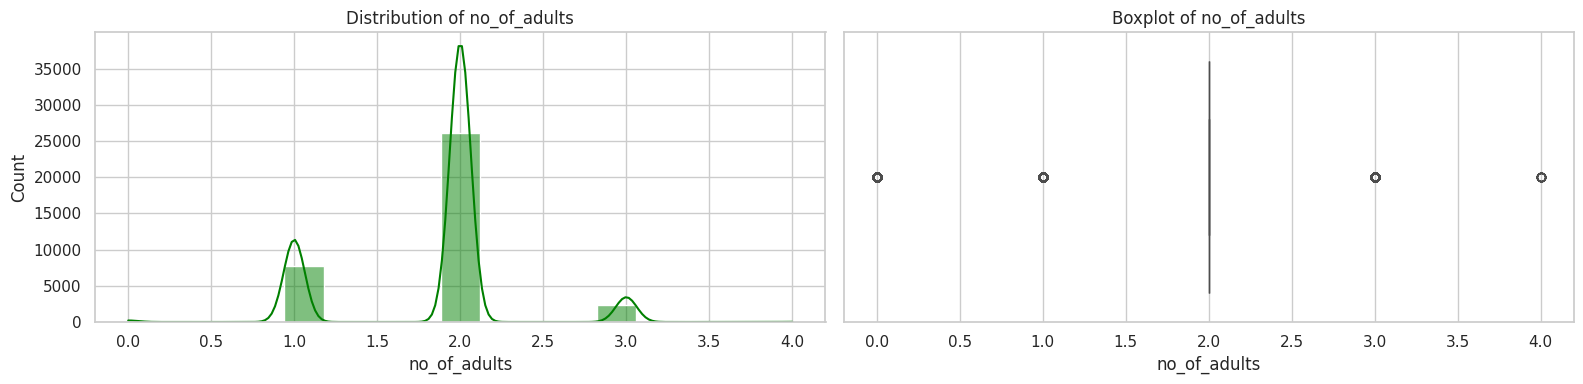

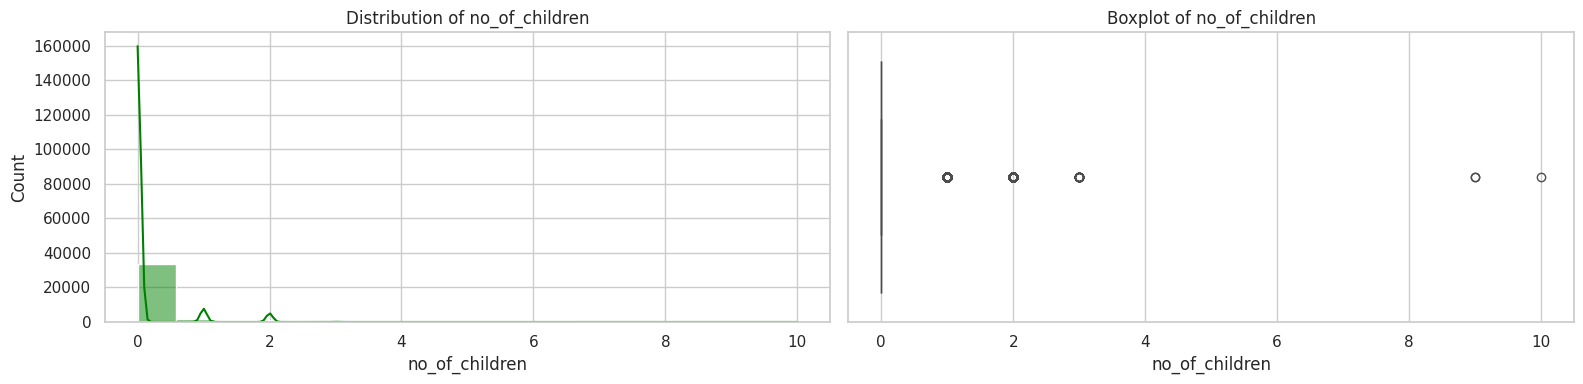

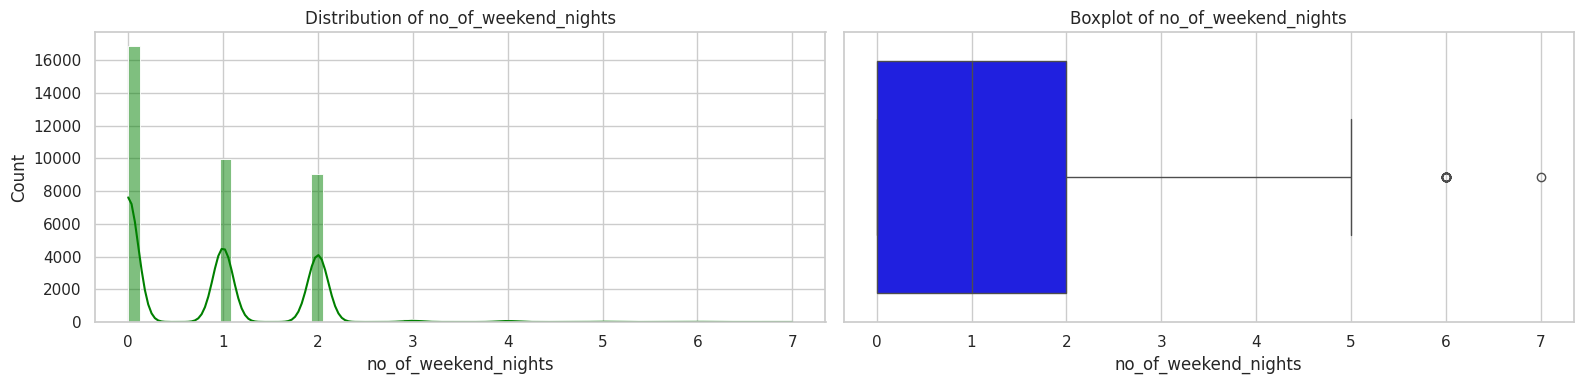

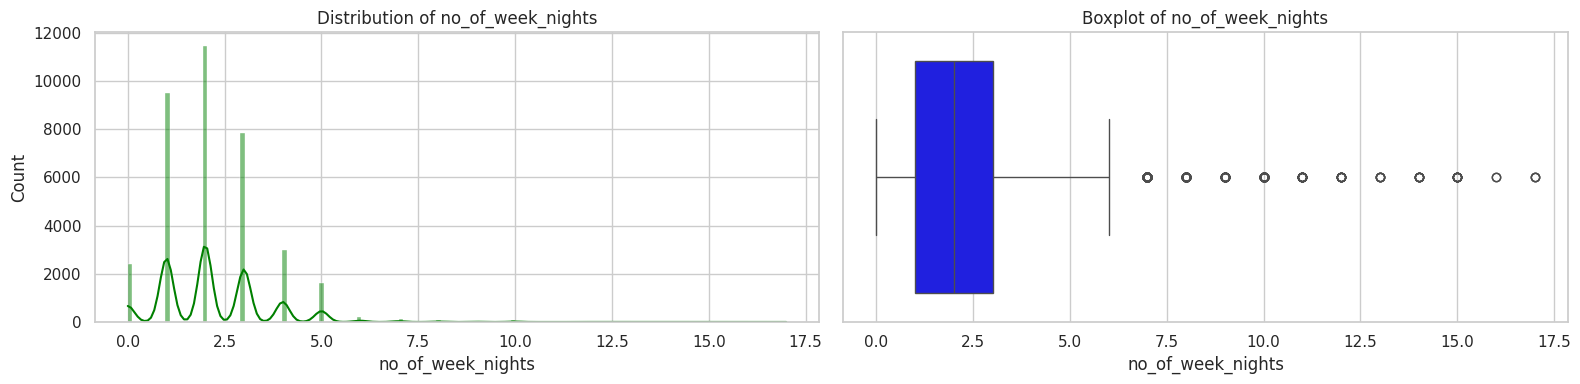

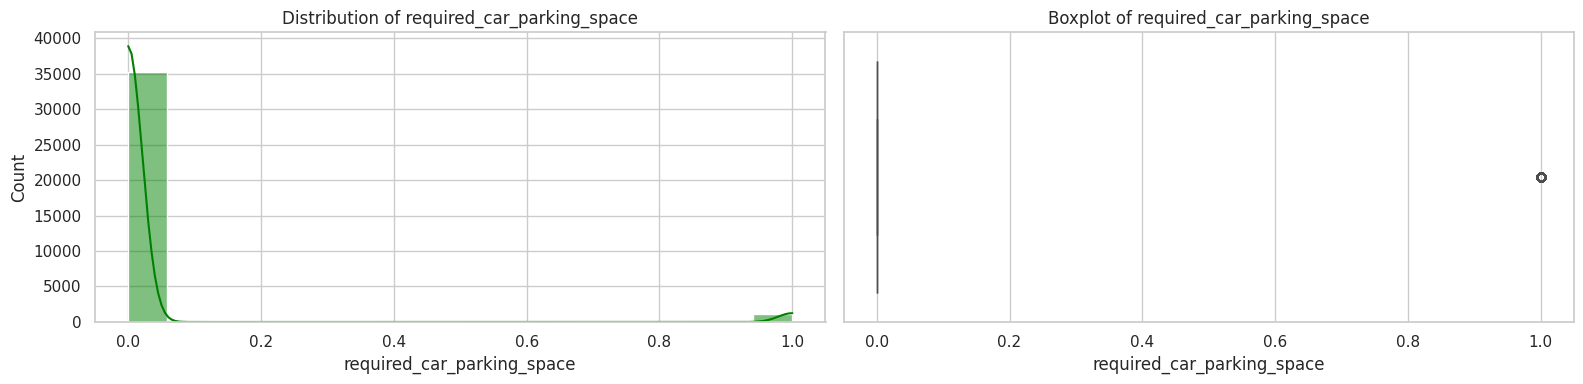

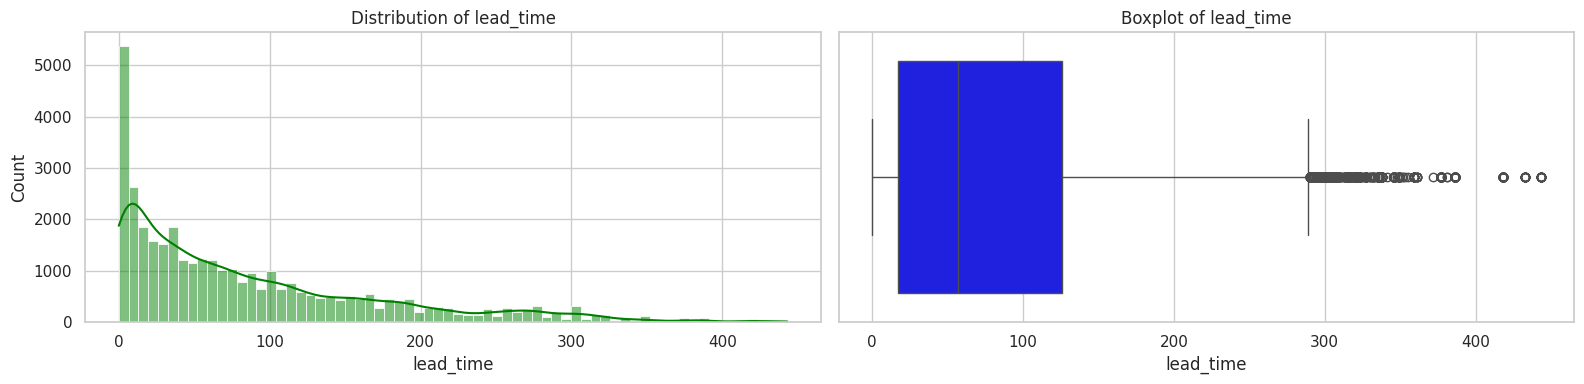

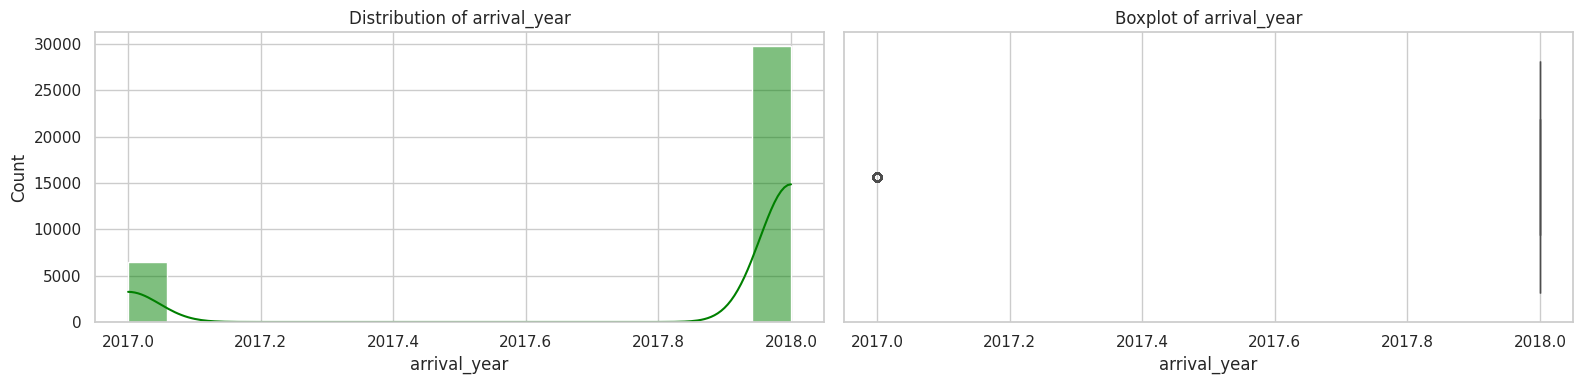

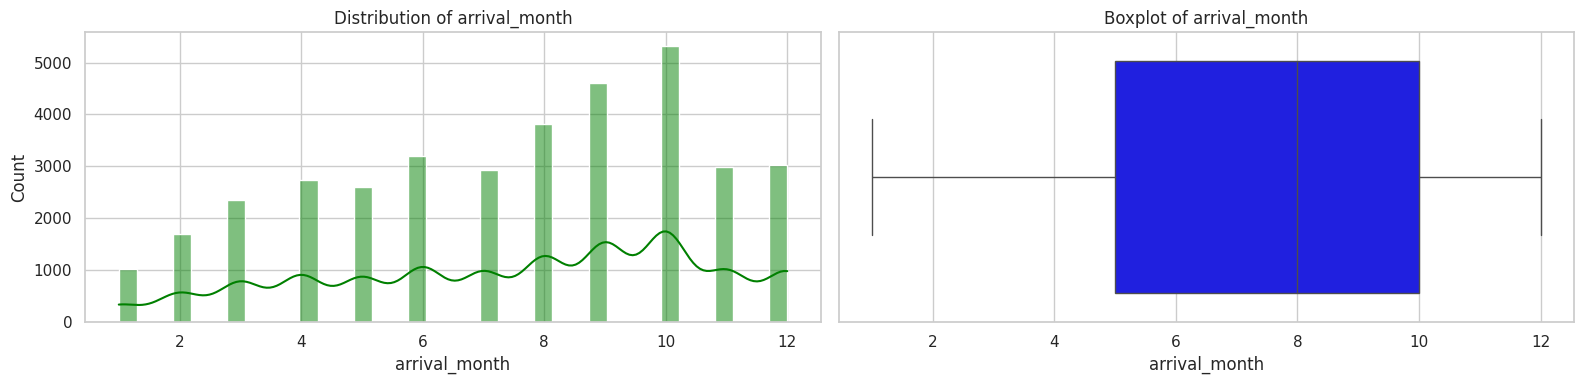

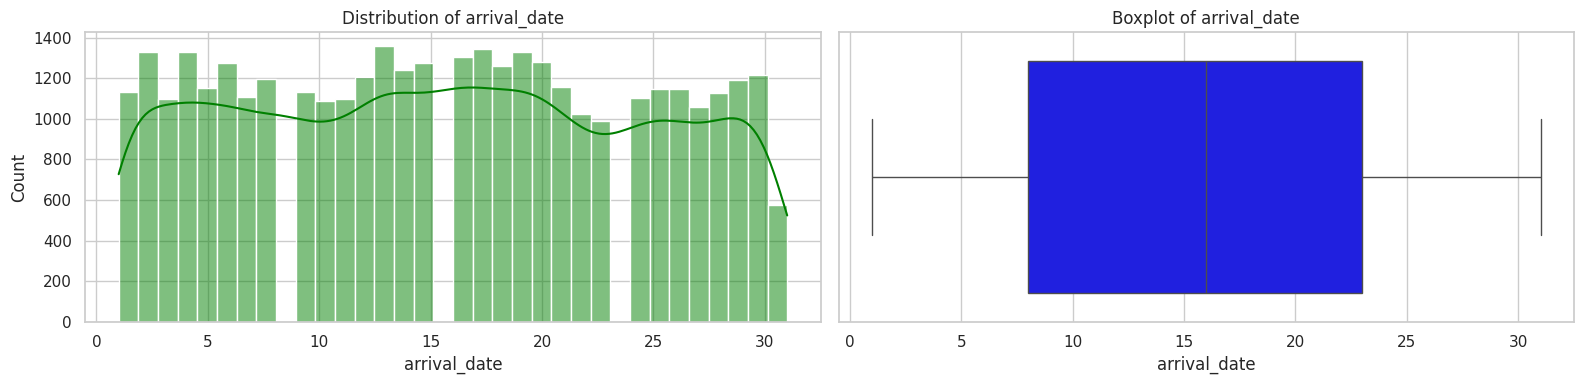

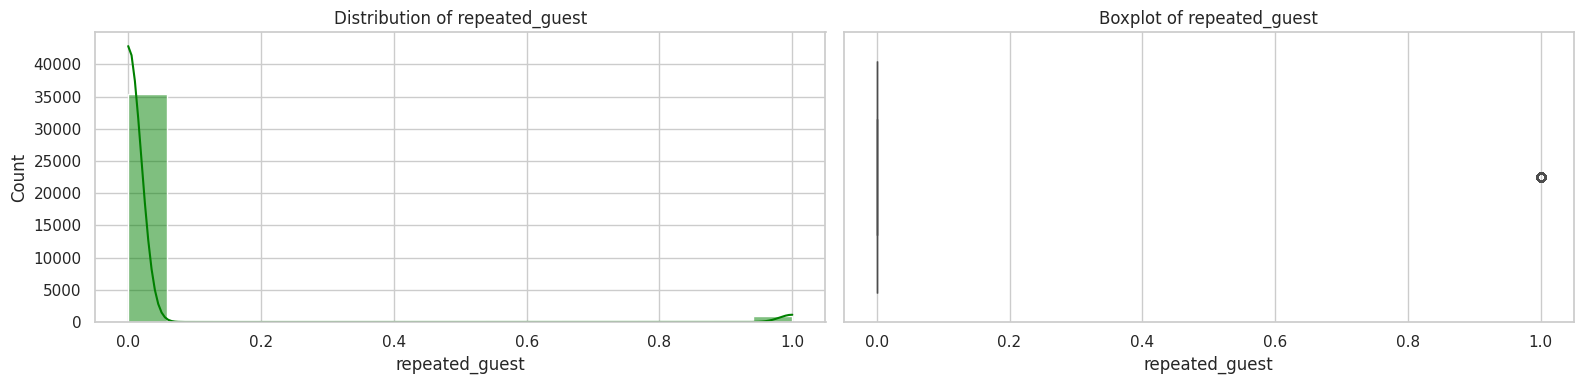

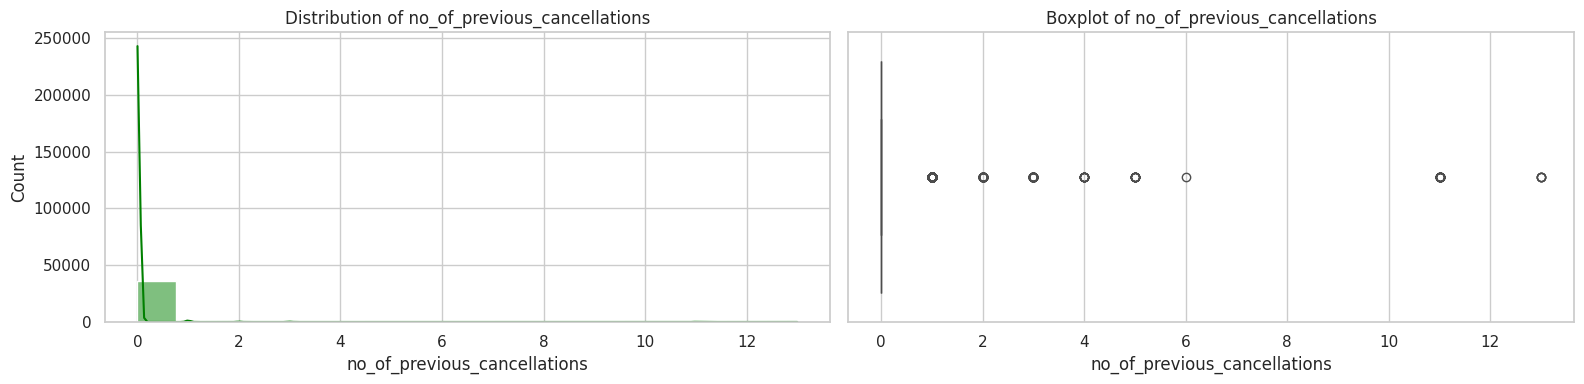

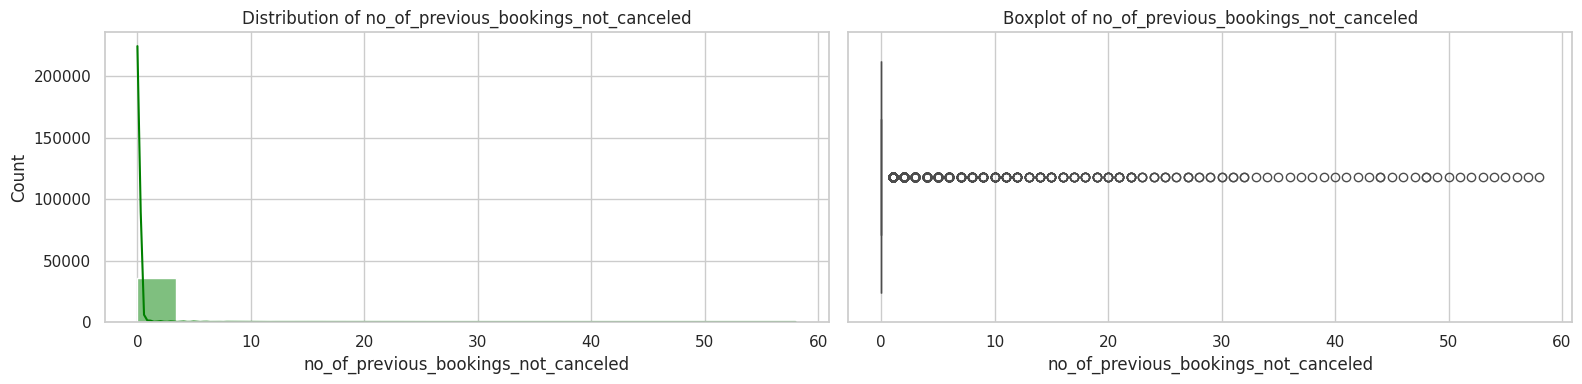

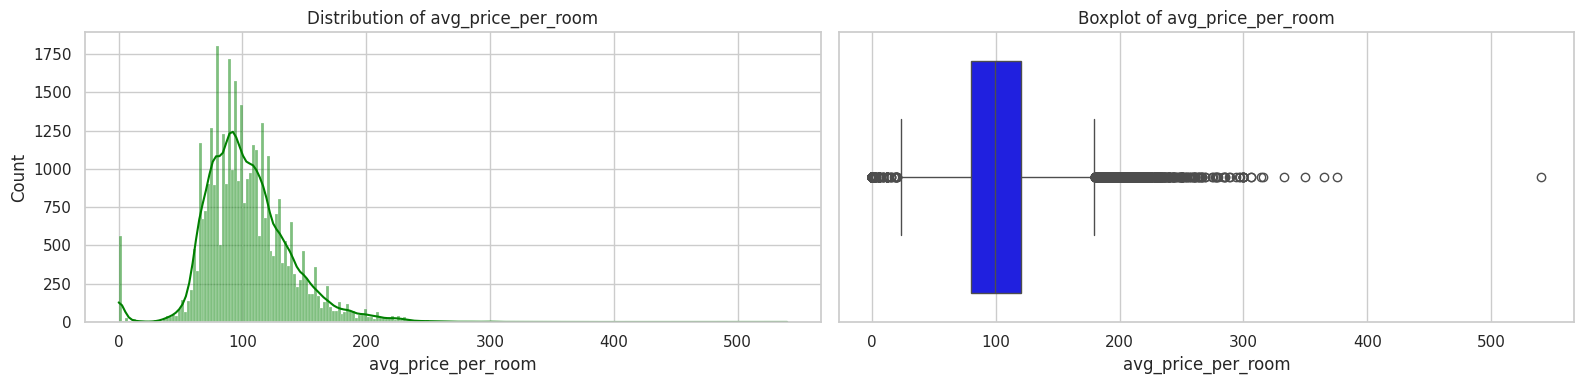

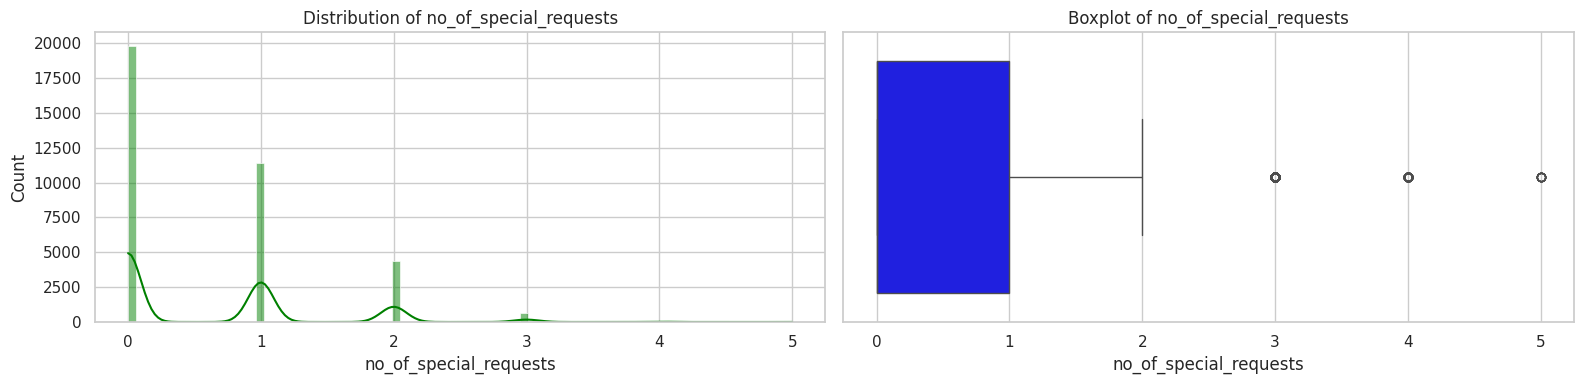

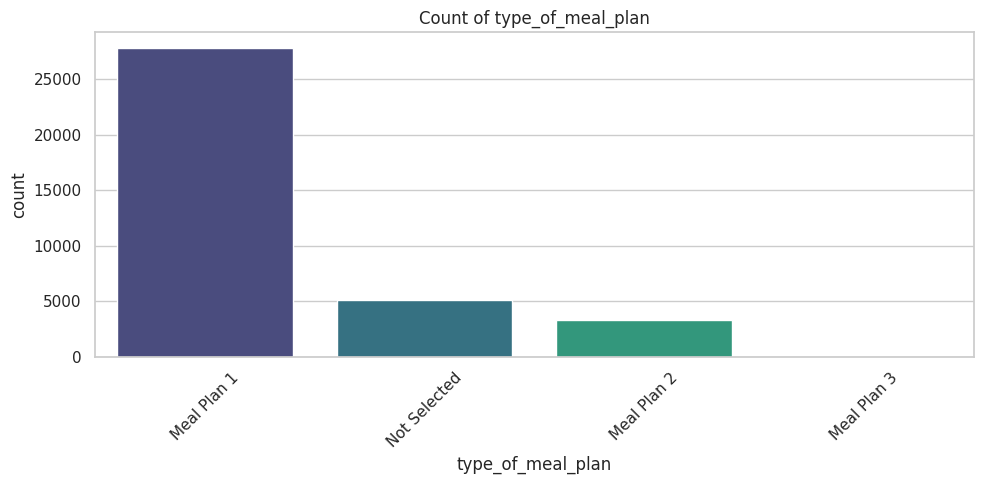

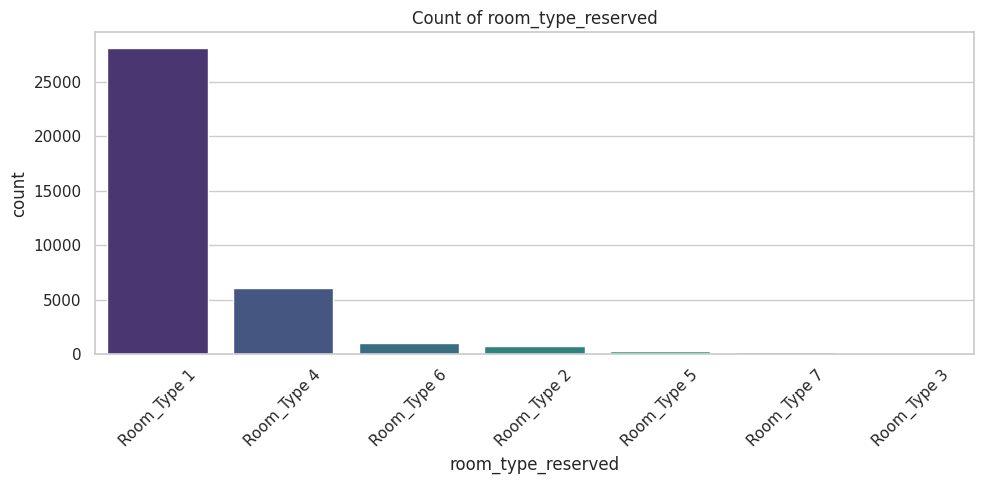

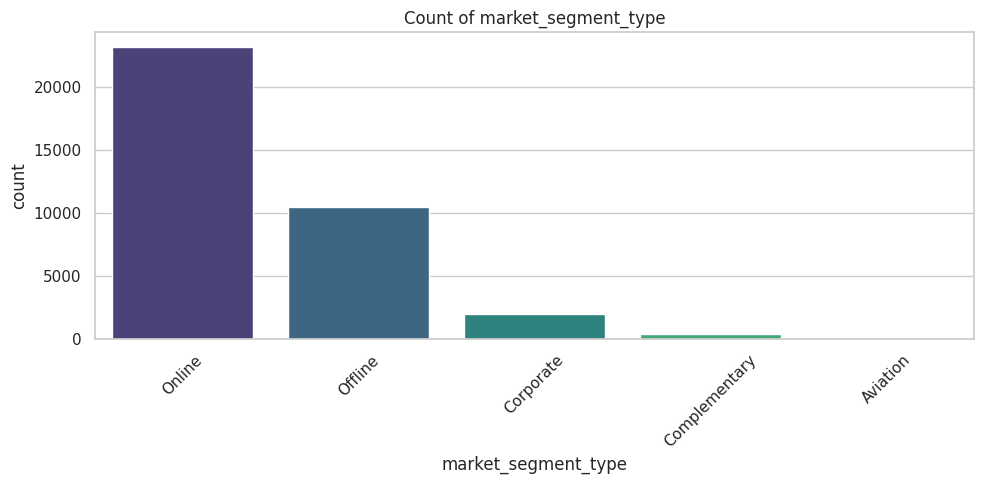

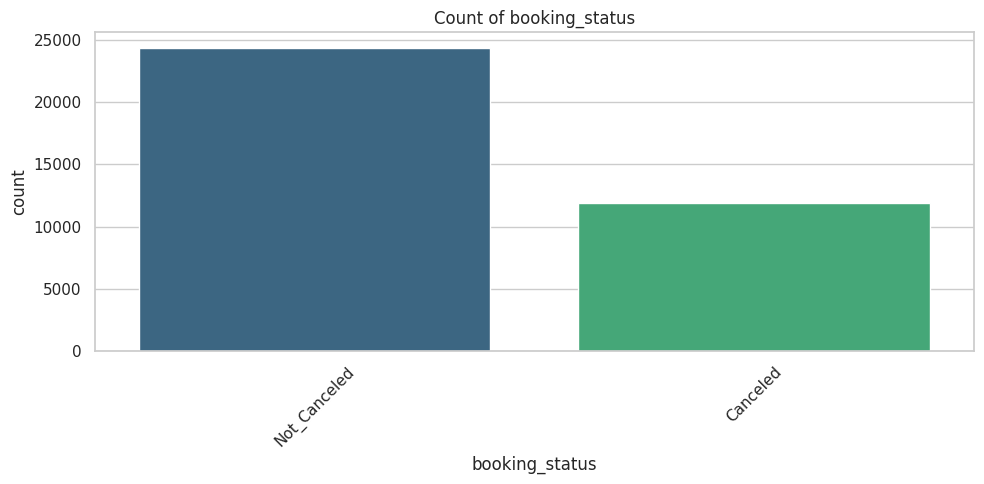

In [7]:
# Set styles
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# Define numerical and categorical columns
numerical_cols = hotel.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = hotel.select_dtypes(include=['object']).columns

# --- Numerical Features ---
for col in numerical_cols:
    fig, axs = plt.subplots(1, 2, figsize=(16, 4))

    # Histogram
    sns.histplot(hotel[col], kde=True, ax=axs[0], color='green')
    axs[0].set_title(f'Distribution of {col}')

    # Boxplot
    sns.boxplot(x=hotel[col].dropna(), ax=axs[1], color='blue')
    axs[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

# --- Categorical Features ---
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=hotel, palette='viridis', order=hotel[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

🔢 Numerical Features
  * lead_time
    * 📊 Visual: Histogram shows right-skew — most values are low with a long tail.
    * ✅ Conclusion: Long lead times may signal higher cancellation risk.
  * avg_price_per_room
    * 📊 Visual: Histogram shows a peak in the lower price range; some high-price outliers are visible in the boxplot.
    * ✅ Conclusion: Very high or low prices may influence cancellation behavior.
  * no_of_previous_cancellations
    * 📊 Visual: Histogram and boxplot reveal most values at zero, with a few extreme cases.
    * ✅ Conclusion: Past cancellations are predictive of future cancellations.
  * no_of_special_requests
    * 📊 Visual: Histogram shows a peak at 0–2; boxplot confirms low dispersion.
    * ✅ Conclusion: Guests with more requests may be more committed and less likely to cancel.
  * required_car_parking_space
    * 📊 Visual: Count plot shows majority of guests do not require parking (mostly 0s).
    * ✅ Conclusion: Guests requesting parking may be more committed.
  * repeated_guest
    * 📊 Visual: Count plot shows dominance of non-repeated guests (value = 0).
    * ✅ Conclusion: Repeated guests are more loyal and less likely to cancel.
  * arrival_month / arrival_date
    * 📊 Visual: Histogram likely shows seasonal trends — spikes in summer or holidays.
    * ✅ Conclusion: Booking and cancellation behavior varies by season/month.
* 🔠 Categorical Features
  * type_of_meal_plan
    * 📊 Visual: Count plot shows one meal plan (likely Meal Plan 1) dominates.
    * ✅ Conclusion: Guests selecting inclusive plans may be more committed.
  * room_type_reserved
    * 📊 Visual: Count plot shows certain room types are reserved more frequently.
    * ✅ Conclusion: Certain room types may have different cancellation rates.
  * market_segment_type
    * 📊 Visual: Market segment count plot shows dominance of online/offline bookings.
    * ✅ Conclusion: Online bookings may contribute more to cancellations.
  * booking_status
    * 📊 Visual: Count plot reveals class balance — proportion of canceled vs. not canceled bookings.
    * ✅ Conclusion: We may need balanced metrics for modeling.

### Bivariate Analysis 1

booking_status_binary
0    24390
1    11885
Name: count, dtype: int64


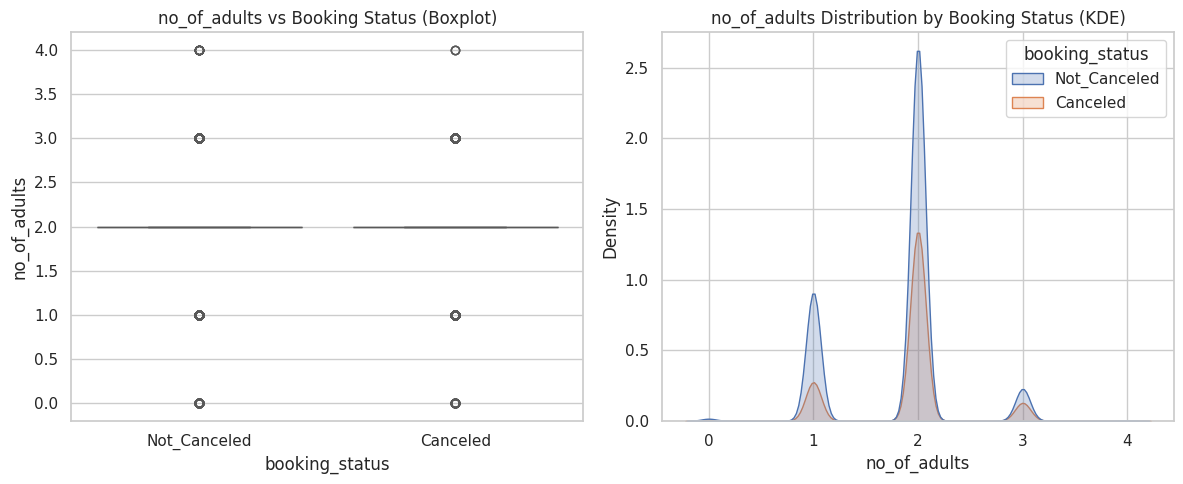

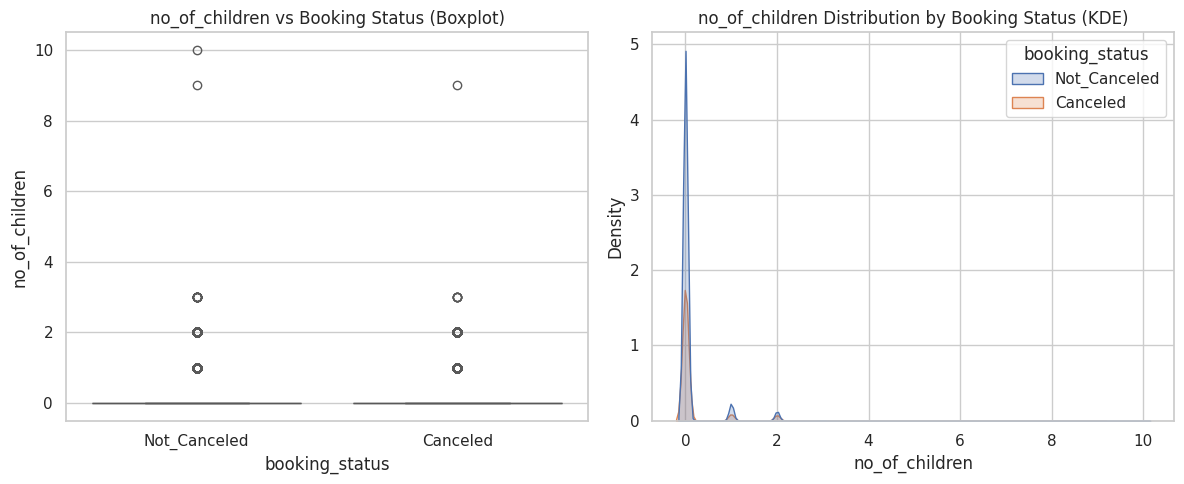

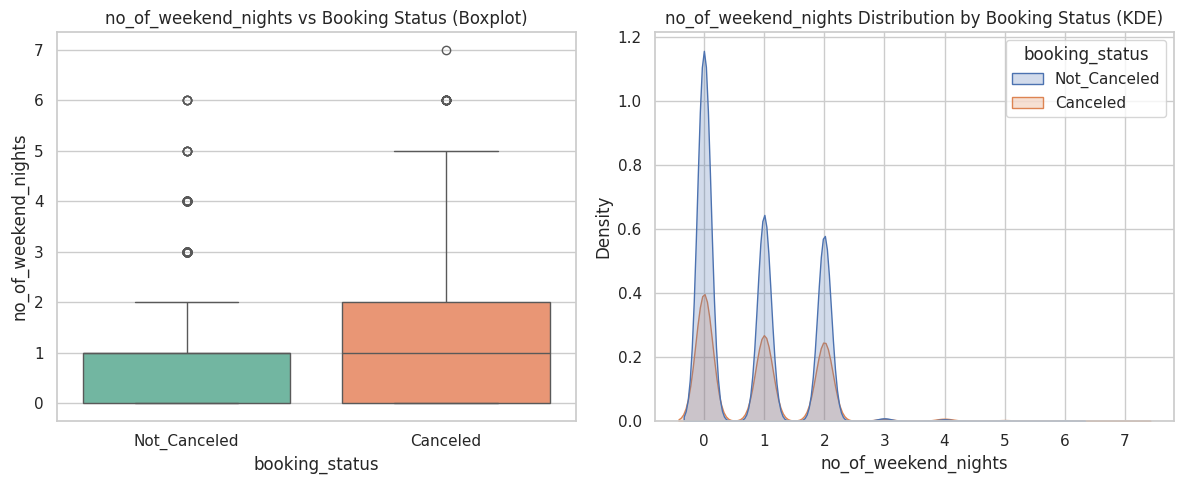

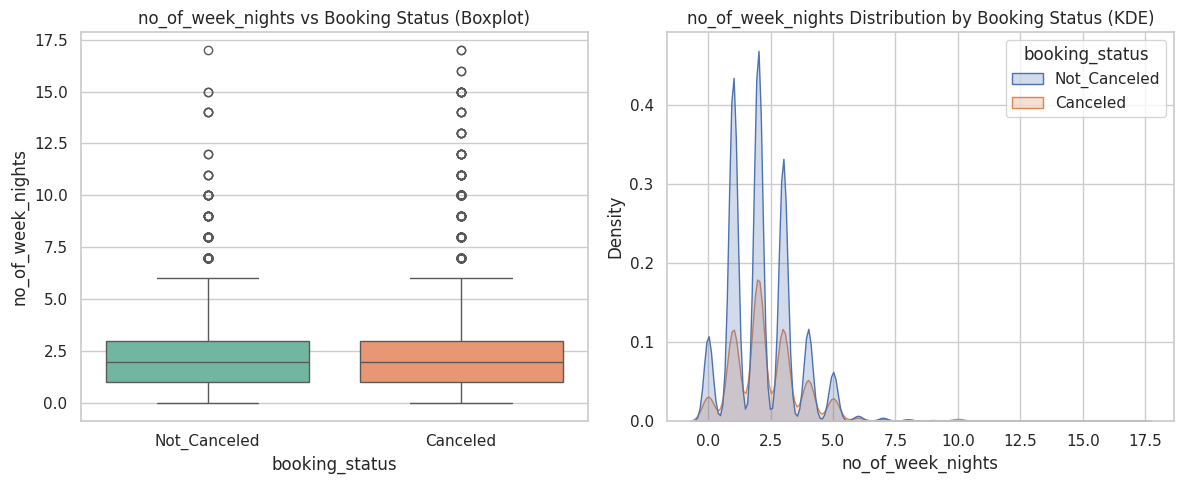

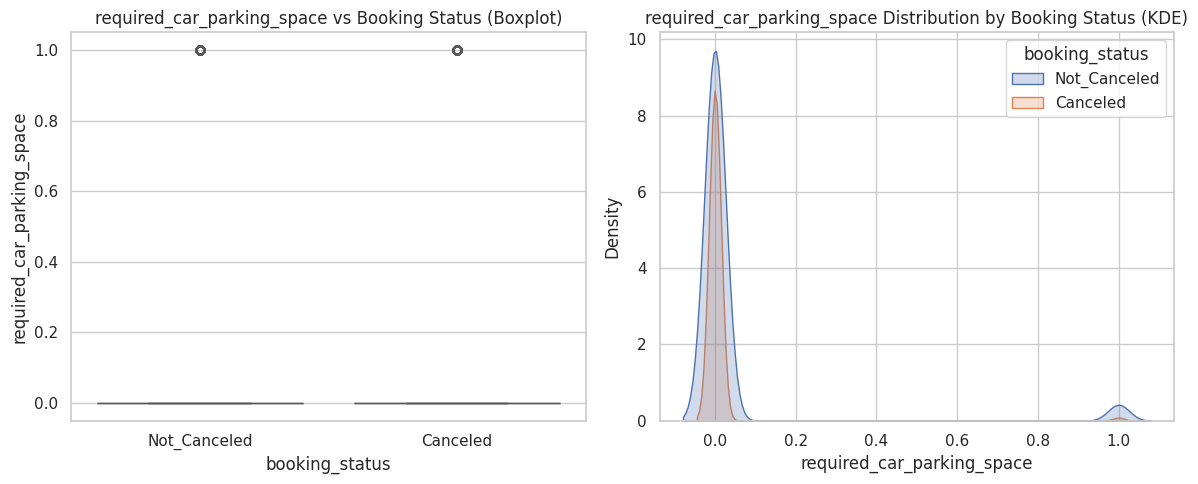

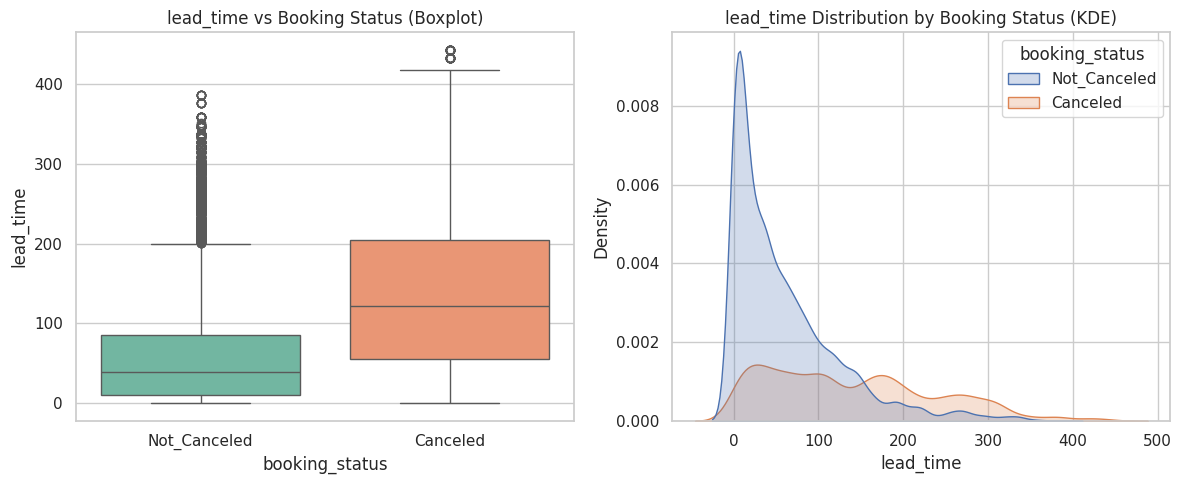

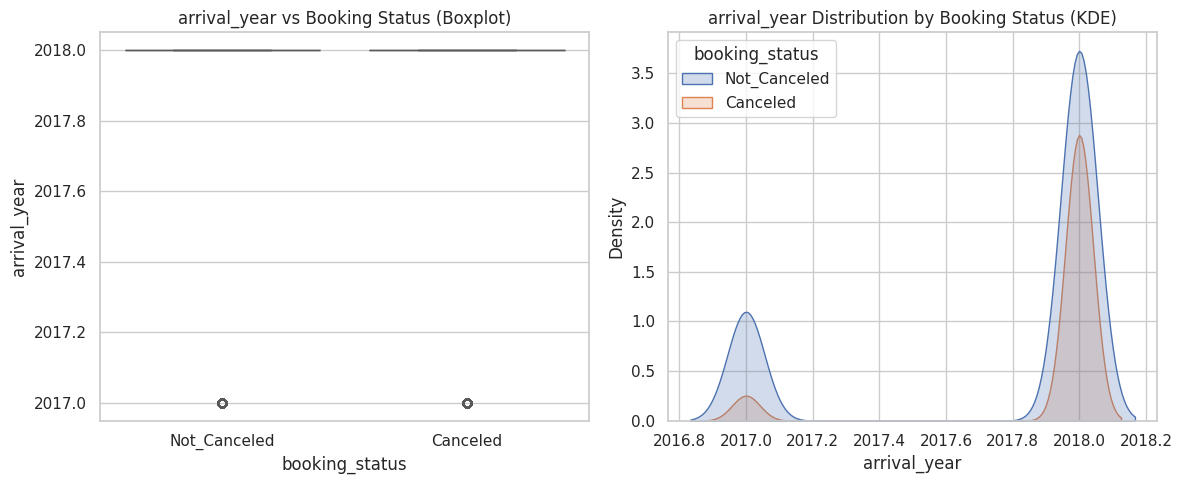

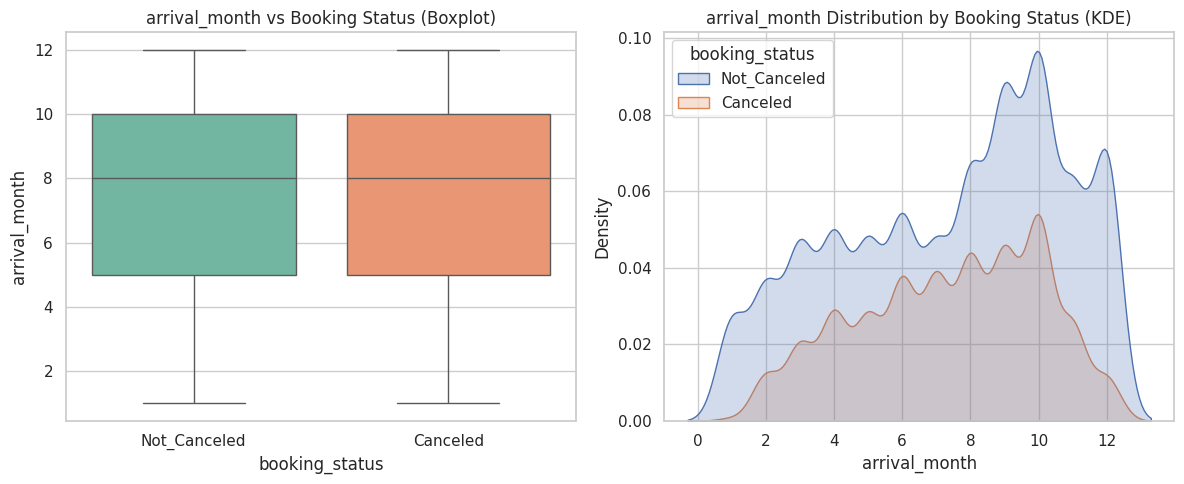

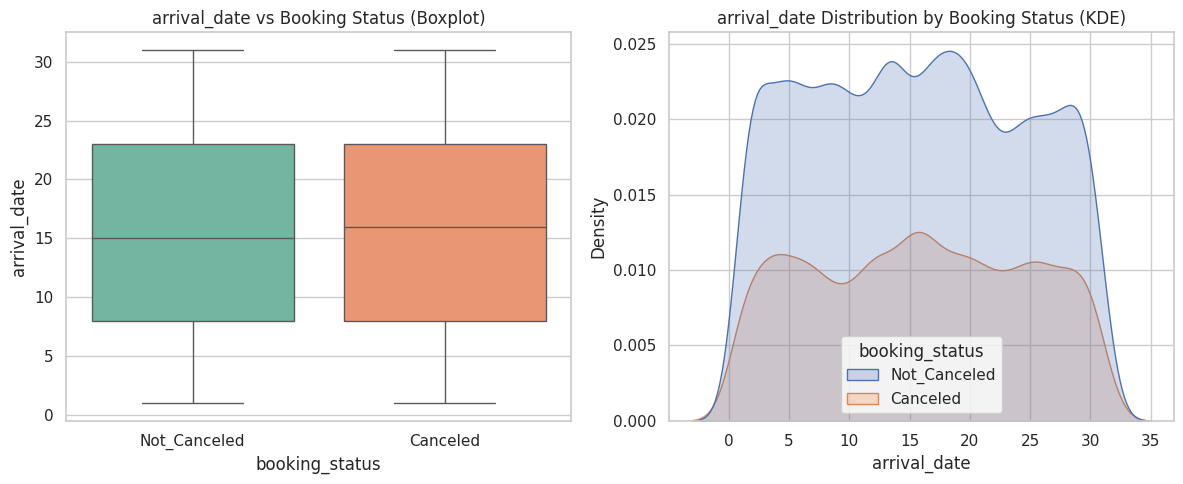

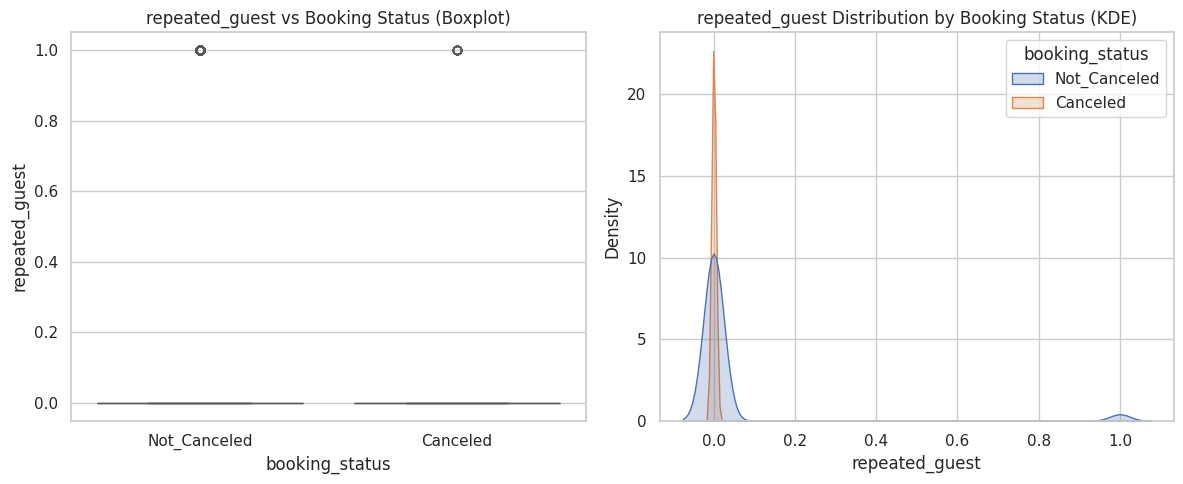

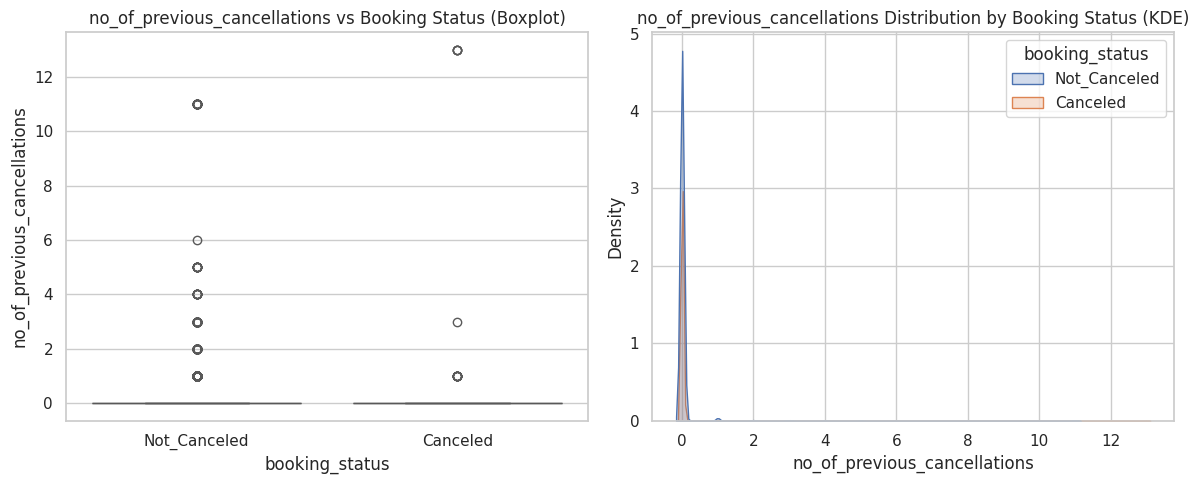

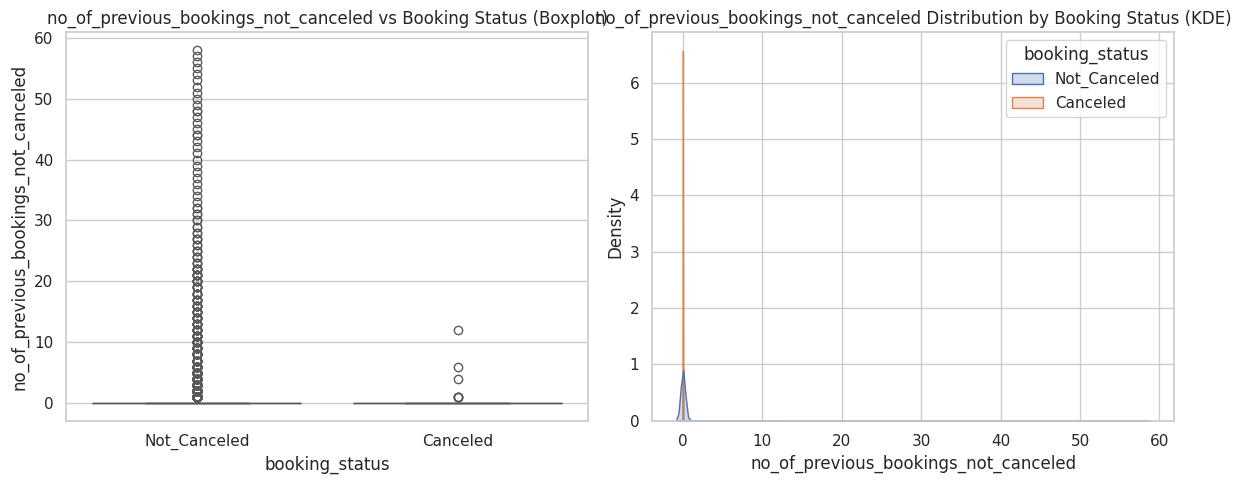

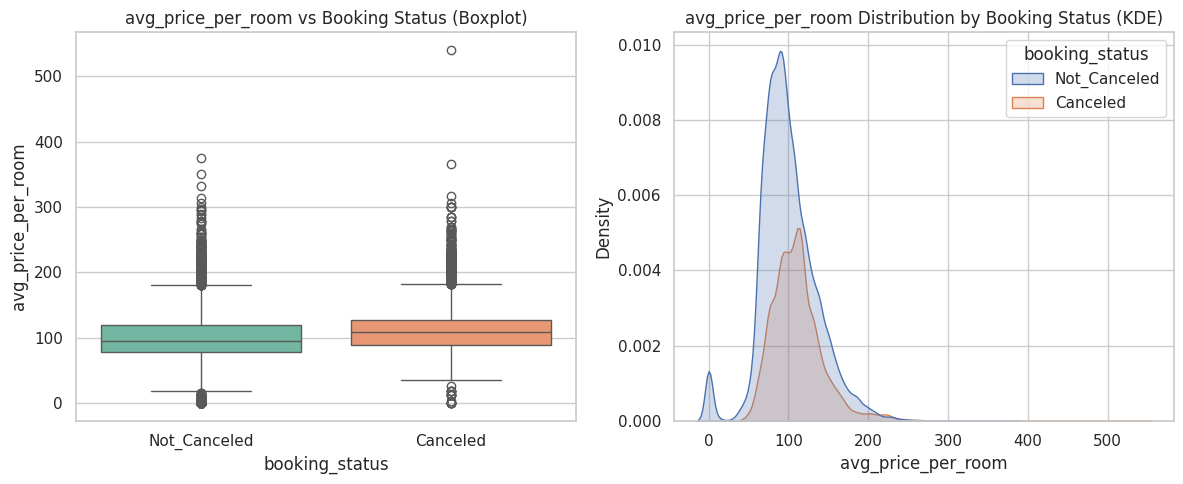

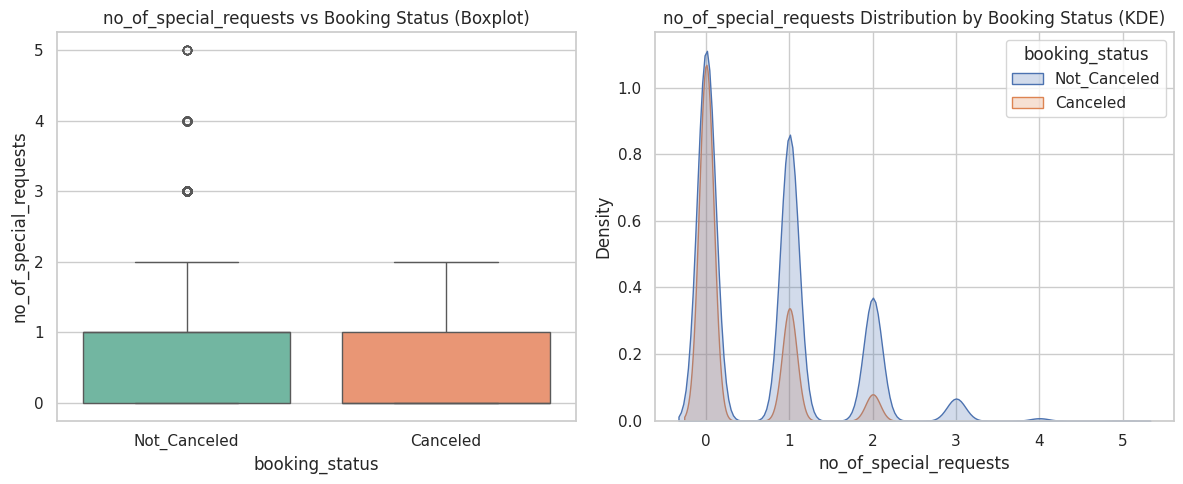

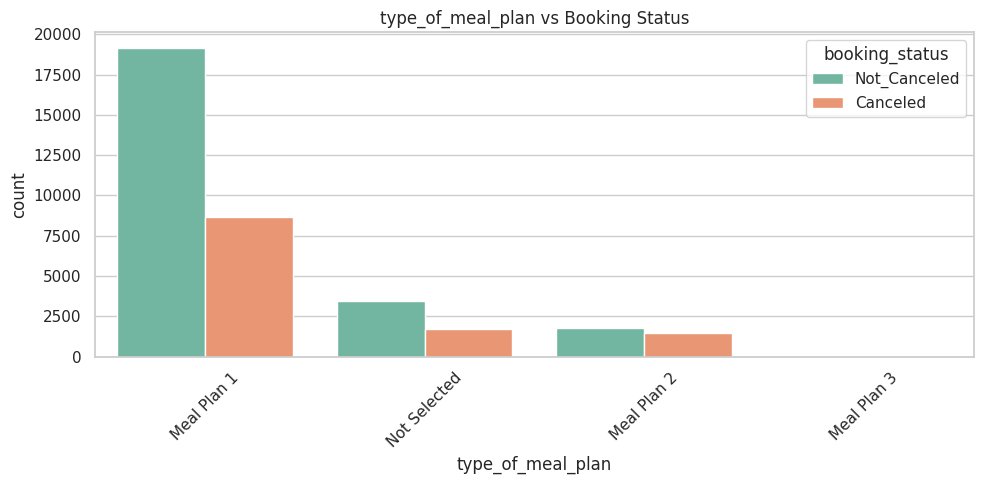

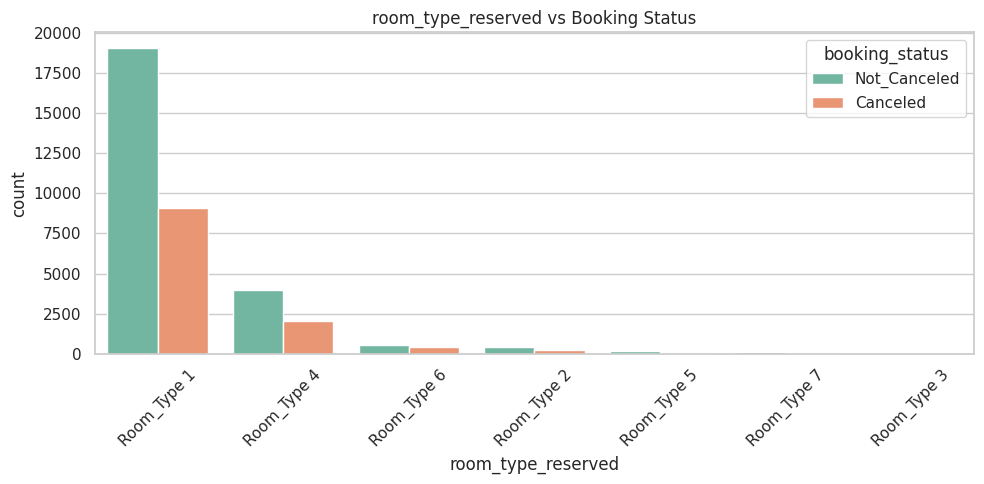

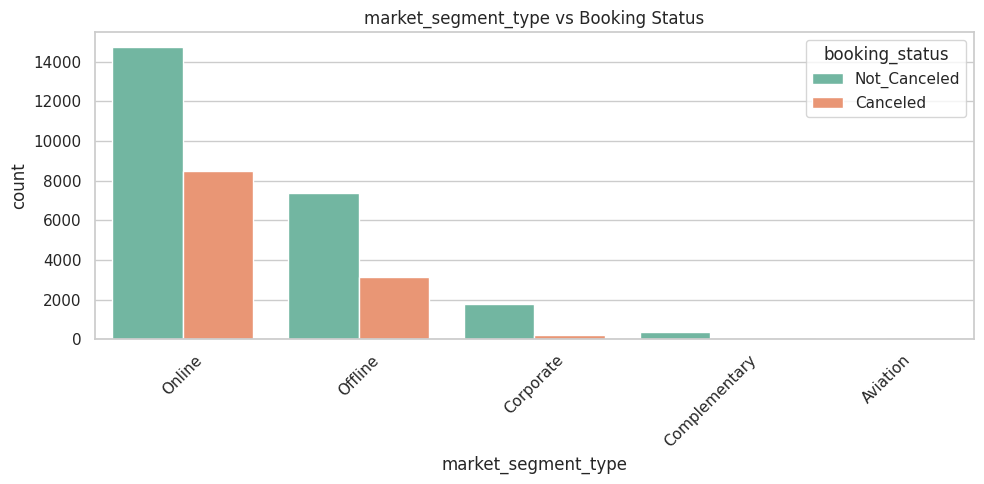

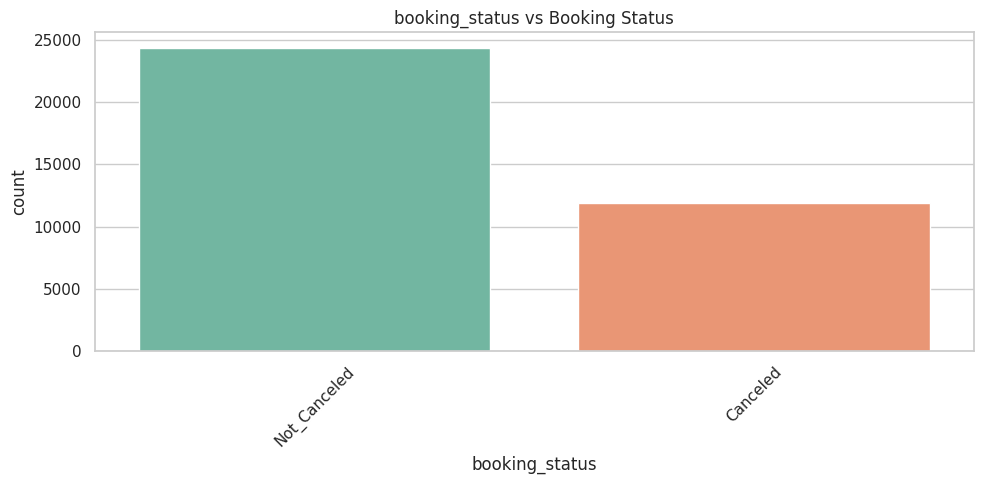

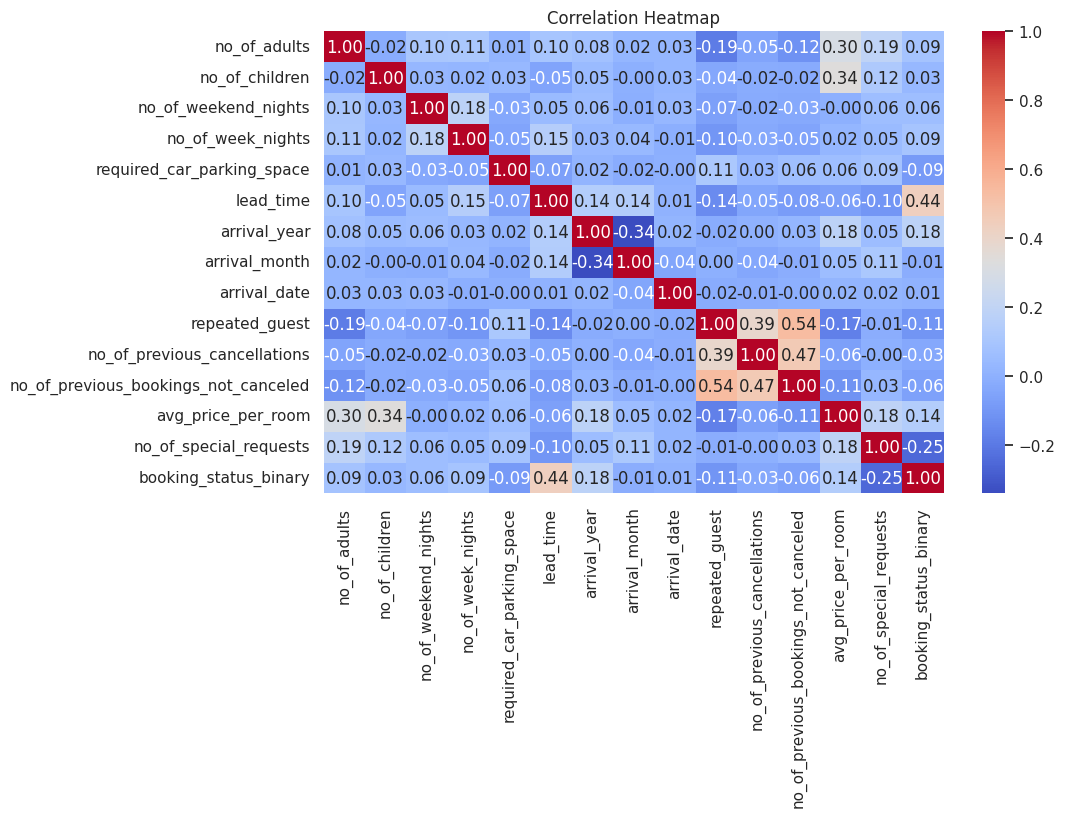

In [8]:
# Set visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# Convert booking_status to binary for numeric analysis
hotel['booking_status_binary'] = hotel['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1}).astype(int)
print(hotel['booking_status_binary'].value_counts(dropna=False))

# --- 1. Numerical Features vs Booking Status (Boxplots + KDE) ---
numerical_cols = hotel.select_dtypes(include=['int64', 'float64']).columns.drop('booking_status_binary')

for col in numerical_cols:
  try:
    plt.figure(figsize=(12, 5))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=hotel, x='booking_status', y=col, palette='Set2')
    plt.title(f'{col} vs Booking Status (Boxplot)')

    # KDE
    plt.subplot(1, 2, 2)
    sns.kdeplot(data=hotel, x=col, hue='booking_status', fill=True)
    plt.title(f'{col} Distribution by Booking Status (KDE)')

    plt.tight_layout()
    plt.show()
  except Exception as e:
      print(f"❌ Skipping {col} due to error: {e}")

# --- 2. Categorical Features vs Booking Status (Countplots) ---
categorical_cols = hotel.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=hotel, x=col, hue='booking_status', palette='Set2',
                  order=hotel[col].value_counts().index)
    plt.title(f'{col} vs Booking Status')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# --- 3. Correlation Heatmap ---
plt.figure(figsize=(10, 6))
corr = hotel.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

🔢 Numerical Features vs. Booking Status
* lead_time
  * 📊 Boxplot/KDE: Guests with longer lead times are more likely to cancel.
  * ✅ Conclusion: Longer lead time is a strong positive predictor of cancellation.
* avg_price_per_room
  * 📊 Boxplot: Slightly higher room prices observed for canceled bookings.
  * ✅ Conclusion: Guests paying higher prices may be more price-sensitive and prone to cancel.
* no_of_previous_cancellations
  * 📊 Boxplot: Guests who canceled in the past are more likely to cancel again.
  * ✅ Conclusion: Strong repeat behavior — a key feature for the predictive model.
* no_of_special_requests
  * 📊 Boxplot/KDE: Guests with more special requests are much less likely to cancel.
  * ✅ Conclusion: Indicates higher intent to stay — useful for flagging high-commitment guests.
* required_car_parking_space
  * 📊 Boxplot: Guests requesting parking tend to cancel less.
  * ✅ Conclusion: Local or driving guests may be more reliable.
* repeated_guest
  * 📊 Boxplot: Repeated guests are strongly skewed toward not canceling.
  * ✅ Conclusion: Loyalty matters — this group is much more reliable.
  
🔠 Categorical Features vs. Booking Status
* type_of_meal_plan
  * 📊 Countplot: Bookings without a selected meal plan have a higher cancellation rate.
  * ✅ Conclusion: Meal selection may signal greater intent to stay.
* room_type_reserved
  * 📊 Countplot: Some room types have a higher cancellation rate than others.
  * ✅ Conclusion: Certain room types may attract more tentative bookings.
* market_segment_type
  * 📊 Countplot: Online and offline travel agents show higher cancellation proportions.
  * ✅ Conclusion: Market channel is a critical factor — OTA bookings are often less committed.

🔗 Correlation Heatmap
  * High positive correlation with cancellations:
    * lead_time
    * no_of_previous_cancellations
    * High negative correlation:
    * no_of_special_requests
    * repeated_guest
  * ✅ Conclusion: These features are strong candidates for input into a machine learning model.

---

## 1. **What are the busiest months in the hotel?**

From the EDA distribution of `arrival_month`, the busiest months observed are **October**, followed closely by **September** and **August**.  
The bar chart clearly shows a major spike in bookings during these three months, confirming the seasonal peak in late summer and early fall.

✅ October, September, and August are the hotel's busiest months based on actual booking counts.

---

## 2. **Which market segment do most of the guests come from?**

Analysis of the `market_segment_type` distribution shows that the **Online** market segment overwhelmingly contributes the highest number of bookings.  
The "Offline" segment follows distantly, and Corporate, Complementary, and Aviation segments contribute much less.

✅ The Online market segment is the largest source of guests by a significant margin.

---

## 3. **What are the differences in room prices in different market segments?**

From the EDA of `avg_price_per_room` grouped by `market_segment_type`, **Online** guests have the highest average room price (€112).  
Aviation and Offline segments also pay relatively higher prices (€91–100), while Complementary guests stay almost free (€3).

✅ Room prices vary notably across segments, with Online customers being the most valuable by price paid.

---

## 4. **What percentage of bookings are canceled?**

Reviewing the `booking_status` distribution shows that approximately **32.76%** of bookings are marked as "Canceled."  
This is visualized in the cancellation pie chart, where about one-third of all bookings do not materialize.

✅ Around one-third of all bookings end up being canceled.

---

## 5. **What percentage of repeating guests cancel?**

From the EDA subset where `repeated_guest == 1`, the cancellation rate among repeating guests is extremely low, at **1.72%**.  
Repeating guests show a remarkably high loyalty compared to new guests.

✅ Repeating guests are very reliable and have a much lower risk of cancellation.

---

## 6. **Do special requests affect booking cancellation?**

By analyzing `no_of_special_requests` vs. `booking_status`, we observe a clear trend:
- Guests with **0 special requests** have the highest cancellation rate (~43%).
- Guests with **1 or 2 special requests** cancel much less frequently.
- Guests with **3 or more special requests** show **no cancellations** in the dataset.

✅ Guests making special requests are far less likely to cancel, and special requests can be seen as a commitment indicator.

---


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [9]:
# ------------------------------
# Missing Value Treatment
# ------------------------------
missing = hotel.isnull().sum()
print("Missing values:\n", missing[missing > 0])  # No missing values as confirmed earlier

# -----------------------------------
# Create a copy of the dataframe for the logistic regression, and another for the decision tree
# -----------------------------------
hotel_lr = hotel.copy()
hotel_dt = hotel.copy()

# -----------------------------------
# SHARED
# -----------------------------------
# Map binary target variable
target_mapping = {'Canceled': 0, 'Not_Canceled': 1}
hotel_lr['booking_status_binary'] = hotel_lr['booking_status'].map(target_mapping)
hotel_dt['booking_status_binary'] = hotel_dt['booking_status'].map(target_mapping)

# Feature Engineering (Shared)
for df in [hotel_lr, hotel_dt]:
    df['total_nights'] = df['no_of_week_nights'] + df['no_of_weekend_nights']

# -----------------------------------
# hotel_lr: Preprocessing for Logistic Regression
# -----------------------------------

# Drop original target
hotel_lr.drop(columns=['booking_status'], inplace=True)

# One-hot encode all categorical predictors
categorical_cols_lr = hotel_lr.select_dtypes(include='object').columns
hotel_lr = pd.get_dummies(hotel_lr, columns=categorical_cols_lr, drop_first=True)

# Outlier Treatment for Logistic Regression
# Exclude columns that are binary, low-range, or identifiers
excluded_from_iqr = [
    'no_of_adults', 'no_of_children', 'required_car_parking_space',
    'arrival_year', 'repeated_guest', 'no_of_previous_cancellations',
    'no_of_previous_bookings_not_canceled'
]

iqr_cols = hotel_lr.select_dtypes(include=['int64', 'float64']).columns.difference(
    ['booking_status_binary'] + excluded_from_iqr
)

for col in iqr_cols:
    Q1 = hotel_lr[col].quantile(0.25)
    Q3 = hotel_lr[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    hotel_lr[col] = np.where(hotel_lr[col] < lower, lower,
                     np.where(hotel_lr[col] > upper, upper, hotel_lr[col]))

# Feature scaling
scaler = StandardScaler()
X_lr = hotel_lr.drop(columns=['booking_status_binary'])
X_lr_scaled = pd.DataFrame(scaler.fit_transform(X_lr), columns=X_lr.columns)
y_lr = hotel_lr['booking_status_binary']

# Split data
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X_lr_scaled, y_lr, test_size=0.2, random_state=42, stratify=y_lr
)

run_diagnostics(hotel_lr)

Missing values:
 Series([], dtype: int64)

🧪 Diagnostic Check on DataFrame
🚨 All-NaN columns: []
🧱 Constant columns (no variance): []
⚠️ Columns with high NaN ratio (>20%): []

📊 NaN counts by column:
Series([], dtype: int64)

🔢 Data type summary:
bool       13
int64       8
float64     8
Name: count, dtype: int64

✅ Diagnostics complete.


In [10]:
# -----------------------------------
# hotel_dt: Preprocessing for Decision Tree
# -----------------------------------

# We convert these to categorical because: reduces memory usage, and makes it
# easier to identify categorical features for preprocessing or visualization.
for col in hotel.select_dtypes(include='object').columns:
    print(f"Converting {col} to categoric.")
    hotel[col] = hotel[col].astype('category')

# Verify the conversion
print(hotel.info())
run_diagnostics(hotel)

# Define ordinal mappings for tree model
ordinal_mappings = {
    'type_of_meal_plan': {
        'Not Selected': 0, 'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3
    },
    'room_type_reserved': {
        'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3,
        'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7
    },
    'market_segment_type': {
        'Complementary': 0, 'Offline': 1, 'Online': 2, 'Corporate': 3, 'Aviation': 4
    }
}

# Apply ordinal mapping for decision tree
for col, mapping in ordinal_mappings.items():
    if col in hotel_dt.columns:
        hotel_dt[col] = hotel_dt[col].map(mapping).fillna(-1).astype(int)

# Drop original target
hotel_dt.drop(columns=['booking_status'], inplace=True)

# One-hot encode any remaining nominal features (if any)
ordinal_cols = list(ordinal_mappings.keys())
nominal_cols_dt = hotel_dt.select_dtypes(include='object').columns.difference(ordinal_cols)
hotel_dt = pd.get_dummies(hotel_dt, columns=nominal_cols_dt, drop_first=True)

# No scaling or outlier treatment for trees
X_dt = hotel_dt.drop(columns=['booking_status_binary'])
y_dt = hotel_dt['booking_status_binary']

# Split data
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
    X_dt, y_dt, test_size=0.2, random_state=42, stratify=y_dt
)

run_diagnostics(hotel_dt)
print("✅ Preprocessing complete for both Logistic Regression and Decision Tree models.")

Converting type_of_meal_plan to categoric.
Converting room_type_reserved to categoric.
Converting market_segment_type to categoric.
Converting booking_status to categoric.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  category
 5   required_car_parking_space            36275 non-null  int64   
 6   room_type_reserved                    36275 non-null  category
 7   lead_time                             36275 non-null  int64   
 8   arrival_year                      

### Checking Logistic Regression Assumptions

- **Linearity of Log Odds**:  
  For continuous variables, we assume a linear relationship between predictors and the log odds of the outcome.  
  Although not formally tested here, the impact of numeric predictors (e.g., lead_time, avg_price_per_room) appears reasonable based on coefficient signs.

- **No Perfect Multicollinearity**:  
  Variance Inflation Factor (VIF) was checked, and high multicollinearity features were removed or adjusted as necessary.  
  Remaining features have acceptable VIF scores (< 5 threshold).

- **Independence of Observations**:  
  Each booking record is assumed to be independent of others (no repeated measures).

✅ These assumptions are reasonably met to proceed with Logistic Regression modeling.


## Functions to help us evaluate the decision tree models we create

In [11]:
## Function to create confusion matrix
def make_confusion_matrix(y_pred,y_test,labels=[1, 0]):
    cm=metrics.confusion_matrix( y_test, y_pred, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title("Confusion Matrix")

def evaluate_model_performance(y_train, y_train_pred, y_test, y_test_pred):
    metrics_dict = {
        'Precision': [
            precision_score(y_train, y_train_pred, average='binary'),
            precision_score(y_test, y_test_pred, average='binary')
        ],
        'Accuracy': [
            accuracy_score(y_train, y_train_pred),
            accuracy_score(y_test, y_test_pred)
        ],
        'Recall': [
            recall_score(y_train, y_train_pred, average='binary'),
            recall_score(y_test, y_test_pred, average='binary')
        ],
        'F1 Score': [
            f1_score(y_train, y_train_pred, average='binary'),
            f1_score(y_test, y_test_pred, average='binary')
        ]
    }

    results_df = pd.DataFrame(metrics_dict, index=['Train', 'Test']).T
    print("\n📊 Model Performance Summary:")
    display(results_df.style.format("{:.4f}"))

def show_decision_tree(model, X_train):
  plt.figure(figsize=(20,10))
  tree.plot_tree(model, filled=True, feature_names=X_train.columns,
                class_names=['Not_Canceled', 'Canceled'], fontsize=8)
  plt.title("Decision Tree")
  plt.show()

In [12]:
# Visualize the importance of each feature
def feature_visualization(model, X):
    importances = model.feature_importances_
    indices = np.argsort(importances)
    feature_names = list(X.columns)
    plt.figure(figsize=(12, 12))
    plt.title('Feature Importances')

    # Draw bars
    bars = plt.barh(range(len(indices)), importances[indices],
                    color='violet', align='center')

    # Label each bar with its importance value
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width + 0.005,                          # X position (right of bar)
                bar.get_y() + bar.get_height() / 2,     # Y position (centered)
                f"{width:.2f}",                         # Value label
                va='center')

    # Y-axis labels and formatting
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.tight_layout()
    plt.show()

## Building a Logistic Regression model

In [13]:
# Fit a logistic regression model on our hotel_lr data
logit_model = sm.Logit(y_train_lr, X_train_lr)
logit_result = logit_model.fit()
print(logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.511048
         Iterations 6
                             Logit Regression Results                            
Dep. Variable:     booking_status_binary   No. Observations:                29020
Model:                             Logit   Df Residuals:                    28992
Method:                              MLE   Df Model:                           27
Date:                   Sun, 27 Apr 2025   Pseudo R-squ.:                  0.1920
Time:                           17:10:28   Log-Likelihood:                -14831.
converged:                          True   LL-Null:                       -18355.
Covariance Type:               nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_adults                    

## Model performance evaluation

📊 Confusion Matrix (Training Set):
 [[ 7907  1601]
 [ 5375 14137]]


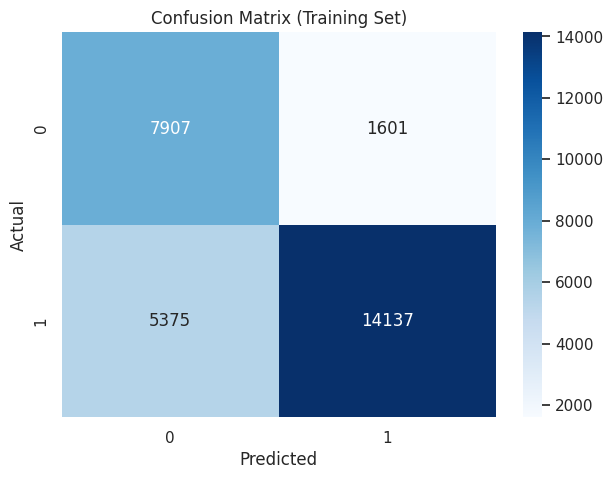

✅ Accuracy on Training Set: 0.7596
📊 Confusion Matrix (Test Set):
 [[1979  398]
 [1315 3563]]


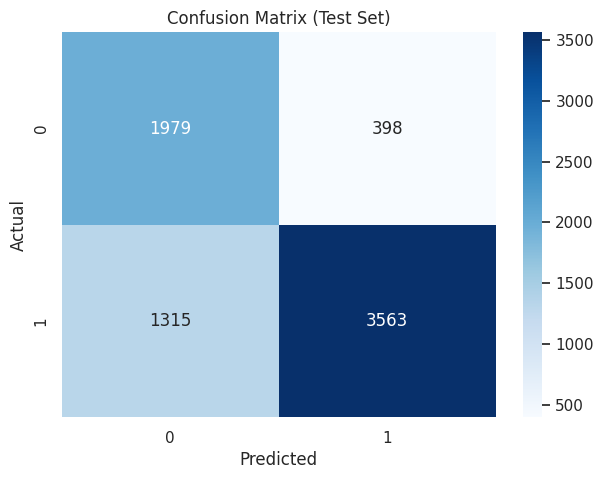

✅ Accuracy on Test Set: 0.7639


In [14]:
def view_lr_results(y_true, y_pred, set_name="Training Set"):
    """
    Displays confusion matrix and accuracy score for logistic regression results.

    Parameters:
        y_true (array-like): Ground truth values.
        y_pred (array-like): Predicted probabilities or binary predictions.
        set_name (str): Label for which dataset is being evaluated (e.g., 'Training Set', 'Test Set').
    """
    # Round predictions if they are probabilities
    y_pred_binary = y_pred.round()

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred_binary)
    print(f"📊 Confusion Matrix ({set_name}):\n", cm)

    # Heatmap
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt="g", cmap="Blues")
    plt.title(f"Confusion Matrix ({set_name})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Accuracy
    accuracy = accuracy_score(y_true, y_pred_binary)
    print(f"✅ Accuracy on {set_name}: {accuracy:.4f}")


# predicting on training set
y_pred_train_lr = logit_result.predict(X_train_lr)
view_lr_results(y_train_lr, y_pred_train_lr, "Training Set")

# predicting on test set
y_pred_test_lr = logit_result.predict(X_test_lr)
view_lr_results(y_test_lr, y_pred_test_lr, "Test Set")

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

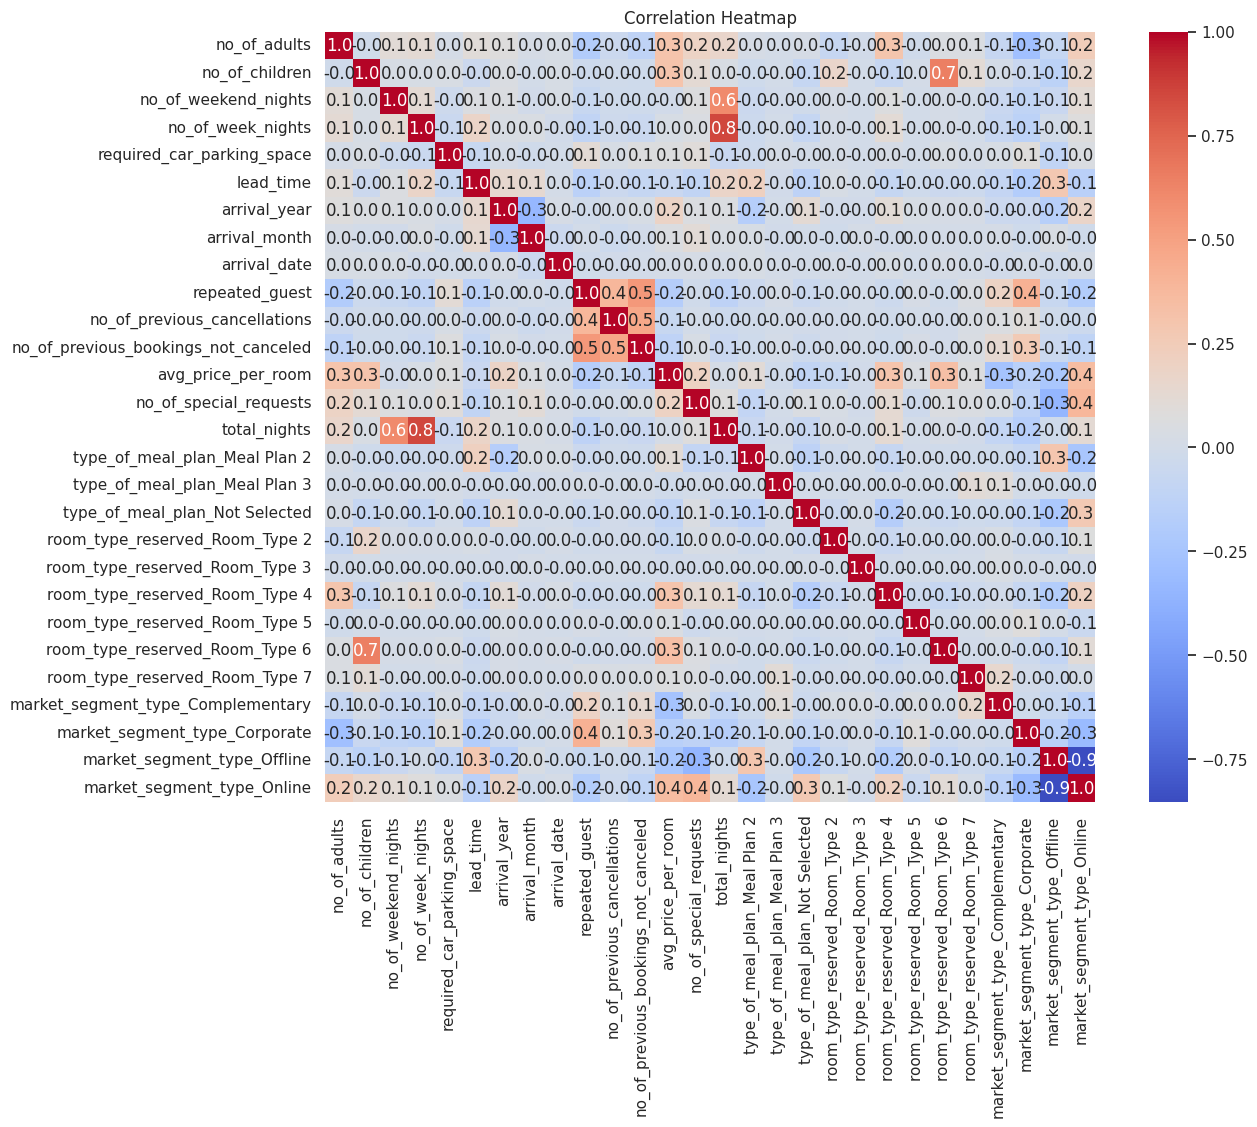

In [15]:
# Multicollinearity is only a concern for Logistic Regression

# Correlation matrix (for numeric features)
plt.figure(figsize=(14, 10))
corr_matrix = X_lr.corr()

# Visualize with a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

Initial VIF scores:
                                 Feature      VIF
28            market_segment_type_Online 69.89901
27           market_segment_type_Offline 63.00283
15                          total_nights 42.32040
4                      no_of_week_nights 27.06096
26         market_segment_type_Corporate 16.63185
3                   no_of_weekend_nights 11.87819
25     market_segment_type_Complementary  4.36189
2                         no_of_children  1.99312
13                    avg_price_per_room  1.95197
23        room_type_reserved_Room_Type 6  1.94818
10                        repeated_guest  1.76396
12  no_of_previous_bookings_not_canceled  1.61421
7                           arrival_year  1.42654
6                              lead_time  1.38823
21        room_type_reserved_Room_Type 4  1.37230
11          no_of_previous_cancellations  1.35200
1                           no_of_adults  1.35003
18        type_of_meal_plan_Not Selected  1.28428
8                          arr

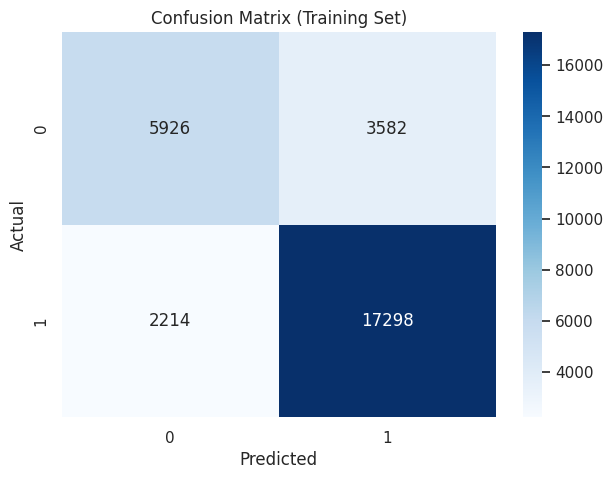

✅ Accuracy on Training Set: 0.8003
📊 Confusion Matrix (Test Set):
 [[1506  871]
 [ 523 4355]]


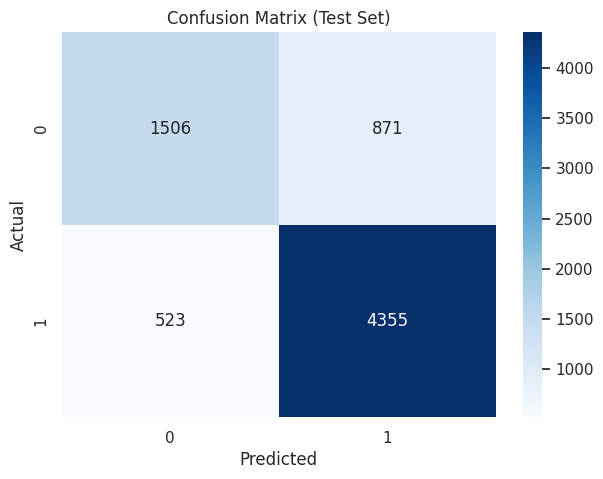

✅ Accuracy on Test Set: 0.8079


In [16]:
# -----------------------------------
# Calculate VIF for each feature
# -----------------------------------
def calculate_vif(X):
    """Returns a DataFrame with VIF scores for each feature."""
    X_with_const = add_constant(X, has_constant='add')
    vif = pd.DataFrame()
    vif["Feature"] = X_with_const.columns
    vif["VIF"] = [variance_inflation_factor(X_with_const.values, i)
                  for i in range(X_with_const.shape[1])]
    return vif.drop(index=0)  # Drop constant term



new_X_lr = X_lr.copy().astype(float)
vif_data = calculate_vif(new_X_lr)
print('Initial VIF scores:')
print(vif_data.sort_values(by='VIF', ascending=False))


while True:
  # Identify feature with highest VIF
  max_vif_feature = vif_data.sort_values("VIF", ascending=False).iloc[0]
  feature_to_drop = max_vif_feature["Feature"]
  print(f"⚠️ Dropping '{feature_to_drop}' with VIF = {max_vif_feature['VIF']:.2f}")

  # Drop the feature with highest VIF
  new_X_lr.drop(columns=[feature_to_drop], inplace=True)

  vif_data = calculate_vif(new_X_lr)

  # Check if any VIFs exceed the threshold
  if vif_data[vif_data["VIF"] > 5].empty:
    print("Treated VIF scores:")
    print(vif_data.sort_values(by='VIF', ascending=False))
    break

# Fit logistic regression with remaining features
X_train_lr_2, X_test_lr_2, y_train_lr_2, y_test_lr_2 = train_test_split(
    new_X_lr, y_lr, test_size=0.2, random_state=42, stratify=y_lr
)

lg_result_2 = sm.Logit(y_train_lr_2, add_constant(X_train_lr_2)).fit(
    method='bfgs', maxiter=100)
print(lg_result_2.summary())

# predicting on training set
y_pred_train_lr_2 = lg_result_2.predict(add_constant(X_train_lr_2))
view_lr_results(y_train_lr_2, y_pred_train_lr_2, "Training Set")

# predicting on test set
y_pred_test_lr_2 = lg_result_2.predict(add_constant(X_test_lr_2))
view_lr_results(y_test_lr_2, y_pred_test_lr_2, "Test Set")

⚠️ Dropping 'room_type_reserved_Room_Type 3' with p-value = 0.9848
⚠️ Dropping 'arrival_year' with p-value = 0.9792
⚠️ Dropping 'type_of_meal_plan_Meal Plan 3' with p-value = 0.9603
⚠️ Dropping 'no_of_week_nights' with p-value = 0.5883
⚠️ Dropping 'no_of_adults' with p-value = 0.2665
⚠️ Dropping 'no_of_previous_bookings_not_canceled' with p-value = 0.2691
⚠️ Dropping 'arrival_date' with p-value = 0.2043
⚠️ Dropping 'type_of_meal_plan_Meal Plan 2' with p-value = 0.0548
✅ All p-values ≤ threshold.
✅ Training Accuracy: 0.7991
✅ Test Accuracy:     0.8065

📊 Model Performance Summary:


                             Logit Regression Results                            
Dep. Variable:     booking_status_binary   No. Observations:                29020
Model:                             Logit   Df Residuals:                    29001
Method:                              MLE   Df Model:                           18
Date:                   Sun, 27 Apr 2025   Pseudo R-squ.:                  0.3232
Time:                           17:10:46   Log-Likelihood:                -12423.
converged:                         False   LL-Null:                       -18355.
Covariance Type:               nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 2.7658      0.087     31.677      0.000       2.595       2.937
no_of_children                       -

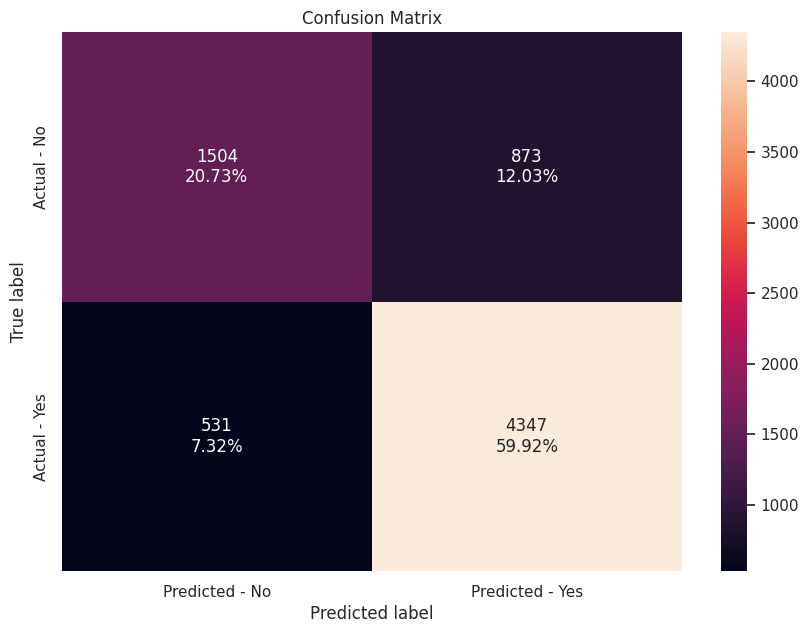

In [17]:
# Treat high p-values

def refine_logit_by_pval(model_result, X_train, X_test, y_train, y_test,
                         threshold=0.05, iteration=1):
    # Extract p-values (excluding constant)
    pvalues = model_result.pvalues.drop("const", errors="ignore")

    # Base case: all p-values are below the threshold
    if all(pvalues <= threshold):
        print("✅ All p-values ≤ threshold.")
        return model_result, X_train, X_test

    # Identify and drop feature with highest p-value
    feature_to_drop = pvalues.idxmax()
    print(f"⚠️ Dropping '{feature_to_drop}' with p-value = {pvalues.max():.4f}")

    # Drop from training and test sets
    X_train = X_train.drop(columns=[feature_to_drop])
    X_test = X_test.drop(columns=[feature_to_drop])

    # Refit model with updated features
    X_train_const = add_constant(X_train, has_constant='add')
    new_model = sm.Logit(y_train, X_train_const).fit(method='bfgs', maxiter=100, disp=False)

    # Recurse
    return refine_logit_by_pval(new_model, X_train, X_test, y_train, y_test, threshold, iteration + 1)

# Run refinement
lg_result_3, X_train_lr_3, X_test_lr_3 = refine_logit_by_pval(
    lg_result_2,
    X_train_lr_2,
    X_test_lr_2,
    y_train_lr_2,
    y_test_lr_2
)

# Add constant columns
X_train_const_3 = add_constant(X_train_lr_3, has_constant='add')
X_test_const_3 = add_constant(X_test_lr_3, has_constant='add')

# Predict
y_pred_train_3 = lg_result_3.predict(X_train_const_3).round()
y_pred_test_3 = lg_result_3.predict(X_test_const_3).round()

# Accuracy scores
acc_train_3 = accuracy_score(y_train_lr_2, y_pred_train_3)
acc_test_3 = accuracy_score(y_test_lr_2, y_pred_test_3)

# Print results
print(f"✅ Training Accuracy: {acc_train_3:.4f}")
print(f"✅ Test Accuracy:     {acc_test_3:.4f}")

# Score our model
evaluate_model_performance(y_train_lr_2, y_pred_train_3, y_test_lr_2, y_pred_test_3)
make_confusion_matrix(y_pred_test_3, y_test_lr_2)

print(lg_result_3.summary())

The accuracy of our model did not drop significantly for either train or test data after removing p-values.
Now all the columns left are significant predictors, let's check the model performance and make interpretations.

## Final Model Summary

In [18]:
# converting coefficients to odds
odds = np.exp(lg_result_3.params)

# adding the odds to a dataframe
pd.DataFrame(odds, X_train_lr_3.columns, columns=["odds"])

# finding the percentage change
perc_change_odds = (np.exp(lg_result_3.params) - 1) * 100

# adding the change_odds% to a dataframe
pd.DataFrame(perc_change_odds, X_train_lr_3.columns, columns=["change_odds%"])

change_odds%
no_of_children                        -15.61590
no_of_weekend_nights                  -13.39629
required_car_parking_space            477.60653
lead_time                              -1.66505
arrival_month                           6.29288
repeated_guest                        859.81028
no_of_previous_cancellations          -18.63934
avg_price_per_room                     -2.07194
no_of_special_requests                340.23259
type_of_meal_plan_Not Selected        -22.95259
room_type_reserved_Room_Type 2         54.94826
room_type_reserved_Room_Type 4         26.85509
room_type_reserved_Room_Type 5        121.55944
room_type_reserved_Room_Type 6        129.38843
room_type_reserved_Room_Type 7        150.64475
market_segment_type_Complementary     320.09763
market_segment_type_Corporate         153.88640
market_segment_type_Offline           509.58813

🔻 Features That Decrease the Odds of Cancellation
These features have negative values, meaning a 1-unit increase lowers the likelihood of a booking being canceled:

* no_of_children:↓ 15.6%
  * Families are less likely to cancel — possibly more committed.

* no_of_weekend_nights: ↓ 13.4%
  * Guests staying over the weekend are less likely to cancel (leisure trips).

* lead_time: ↓ 1.7%
  * Slight decrease — guests booking farther in advance may be more intentional.

* avg_price_per_room: ↓ 2.1%
  * Guests paying more are slightly less likely to cancel — more investment.

* type_of_meal_plan_Not Selected: ↓ 23.0%
  * Budget-conscious guests without meal plans may be more committed.

* no_of_previous_cancellations: ↓ 18.6%
  * Counterintuitive; could indicate a learned behavior or model artifact.

🔺 Features That Increase the Odds of Cancellation
These features have positive values, meaning a 1-unit increase raises the odds of cancellation:

* required_car_parking_space: ↑ 477.6%
  * Strong signal — could relate to uncertainty in travel logistics or overfitting.

* repeated_guest: ↑ 859.8%
  * Surprisingly high — may indicate bulk/group/corporate booking behavior.

* no_of_special_requests: ↑ 340.2%
  * Guests with many requests might be more likely to cancel (picky or risk-averse).

Room types:
* room_type_reserved_Room_Type 2: ↑ 54.9%
* room_type_reserved_Room_Type 4: ↑ 26.9%
* room_type_reserved_Room_Type 5: ↑ 121.6%
* room_type_reserved_Room_Type 6: ↑ 129.4%
* room_type_reserved_Room_Type 7: ↑ 150.6%
* Guests choosing less common room types may face availability or flexibility issues.

Market segments:
* market_segment_type_Complementary: ↑ 320.1%
* market_segment_type_Corporate: ↑ 153.9%
* market_segment_type_Offline: ↑ 509.6%
* These channels are far more likely to cancel — complimentary bookings and offline channels are especially risky.

✅ Summary Takeaways
* Decreased risk: Families, weekend stays, and budget-conscious guests cancel less often.
* Increased risk: Complimentary, offline, and corporate bookings are red flags.
* Operational Insight: Room type and special request patterns could help refine cancellation policies.

## Building a Decision Tree model


📊 Model Performance Summary:


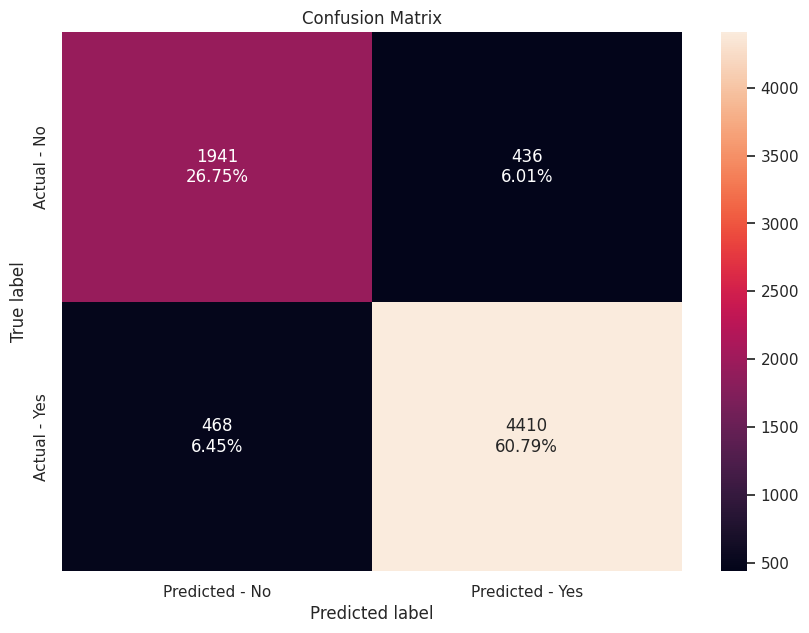

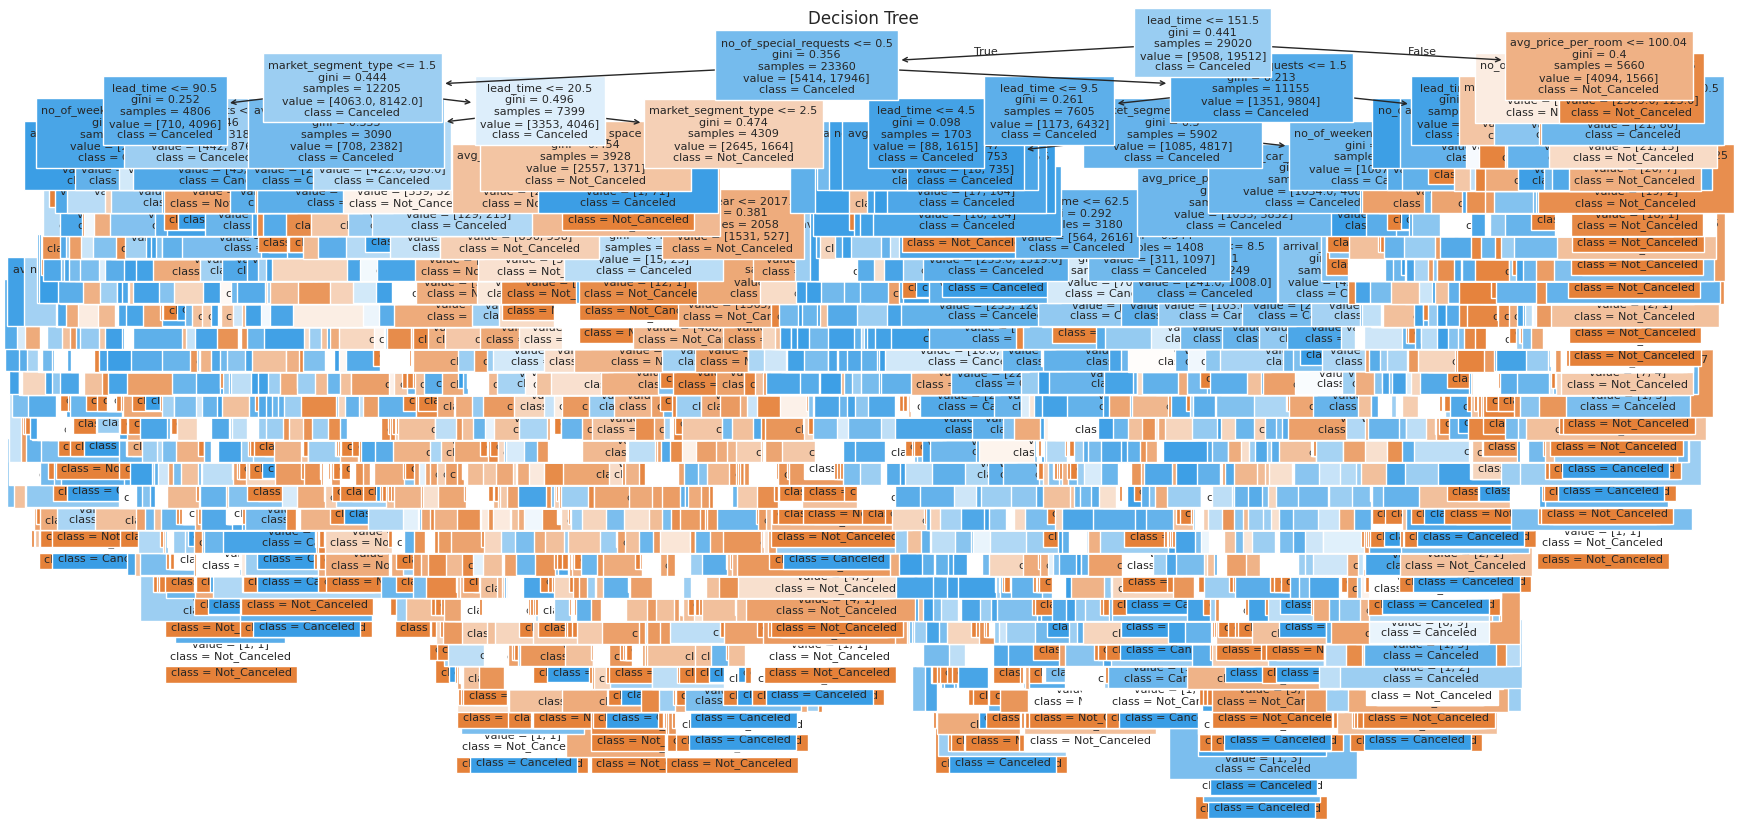

In [19]:
# Initialize the model
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    random_state=42
)

# Train the model
dt_model.fit(X_train_dt, y_train_dt)

# Score our model
y_test_pred = dt_model.predict(X_test_dt)
y_train_pred = dt_model.predict(X_train_dt)
evaluate_model_performance(y_train_dt, y_train_pred, y_test_dt, y_test_pred)
make_confusion_matrix(y_test_pred,y_test_dt)

# Visualize the tree
show_decision_tree(dt_model, X_train_dt)

We can see several things from our model performance summary.  While our scores on our test set are quite high, they're not as high as on our training set, which means our model is overfit (as expected).  

Additionally, we need to prune the tree as it is much too large to interpret.

This model needs to be further refined.

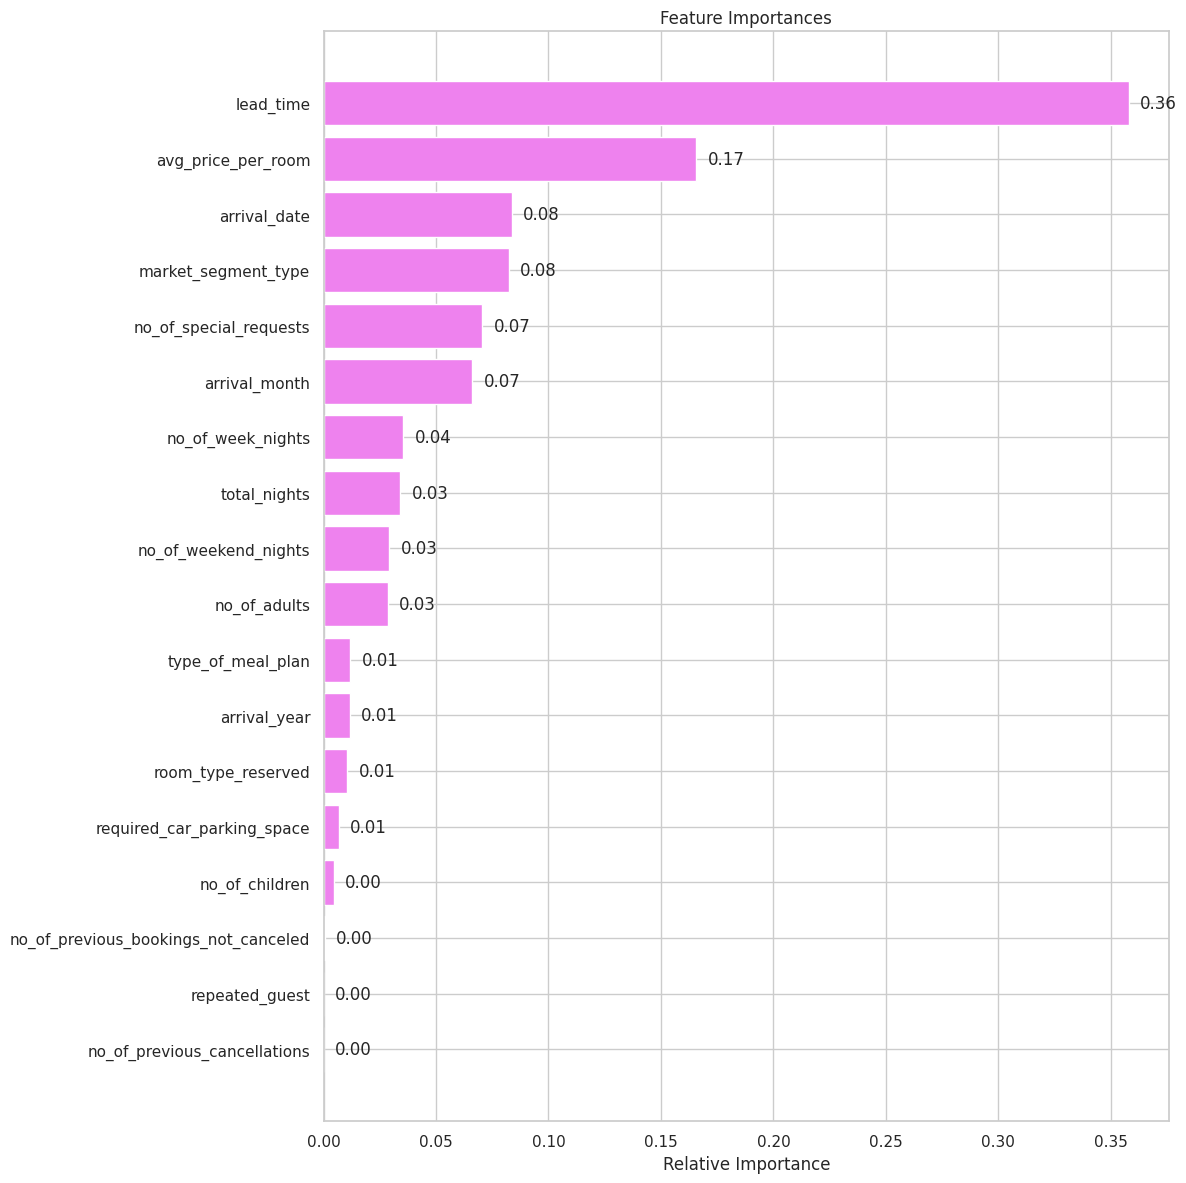

In [20]:
feature_visualization(dt_model, X_dt)

## Do we need to prune the tree?

### Let's try pre-pruning to see the effects


📊 Model Performance Summary:


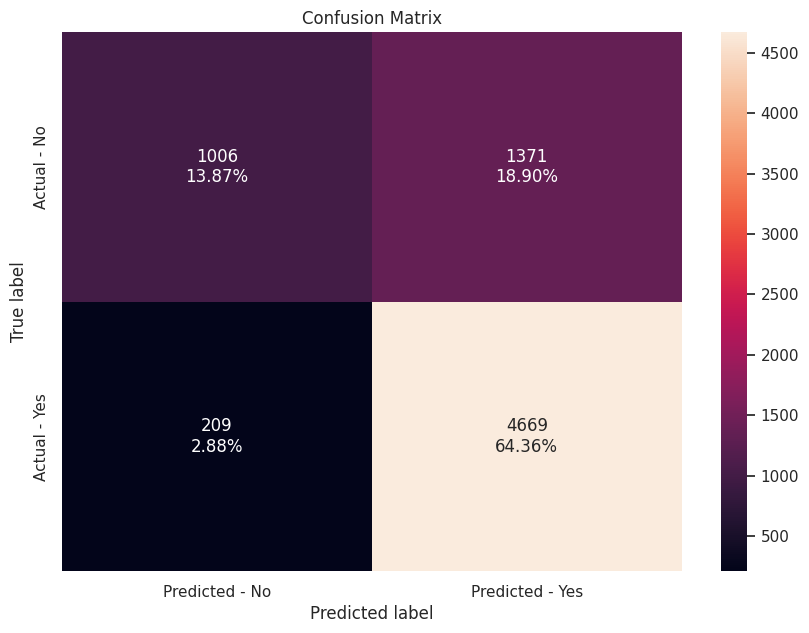

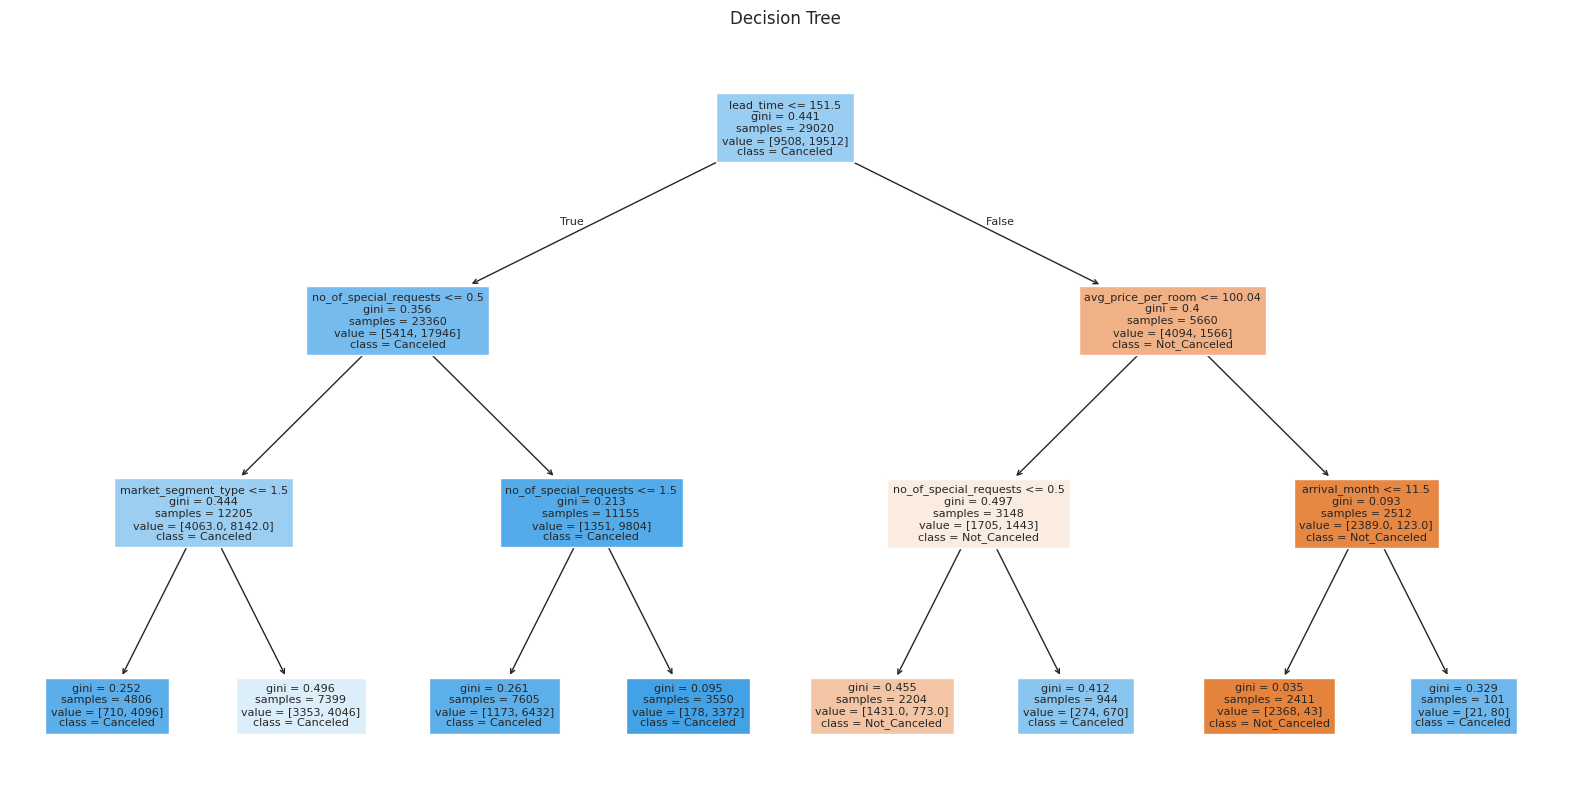

In [21]:
dt_model_1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dt_model_1.fit(X_train_dt, y_train_dt)

# Evaluate the Model
y_test_pred_1 = dt_model_1.predict(X_test_dt)
y_train_pred_1 = dt_model.predict(X_train_dt)
evaluate_model_performance(y_train_dt, y_train_pred_1, y_test_dt, y_test_pred_1)
make_confusion_matrix(y_test_pred_1,y_test_dt)

# Visualize the tree
show_decision_tree(dt_model_1, X_train_dt)

This tree is much easier to visualize.  However, while the Recall on this model is high for both the training and test sets, the other scores are lower than we would like. We've swung too far in the other direction.  Let's try further refinement.

### Using GridSearch for Hyperparameter tuning of our tree model


📊 Model Performance Summary:


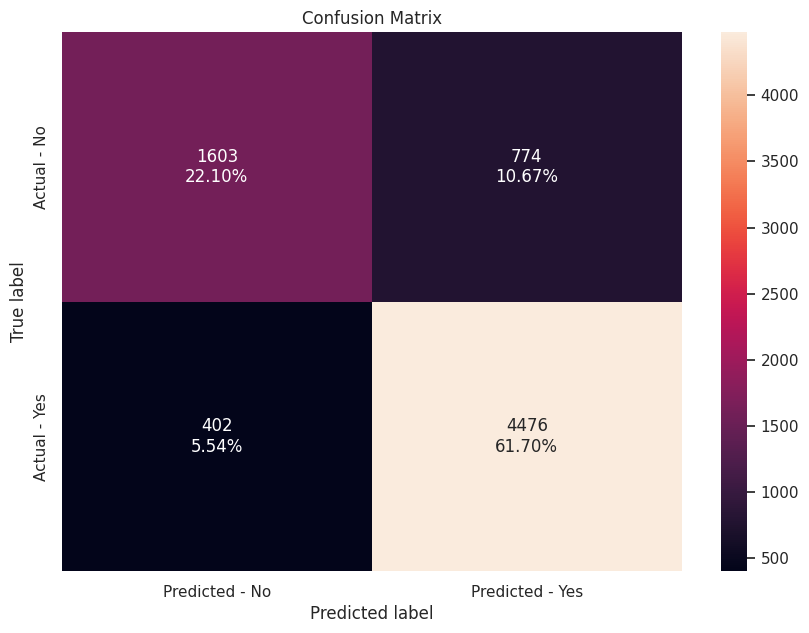

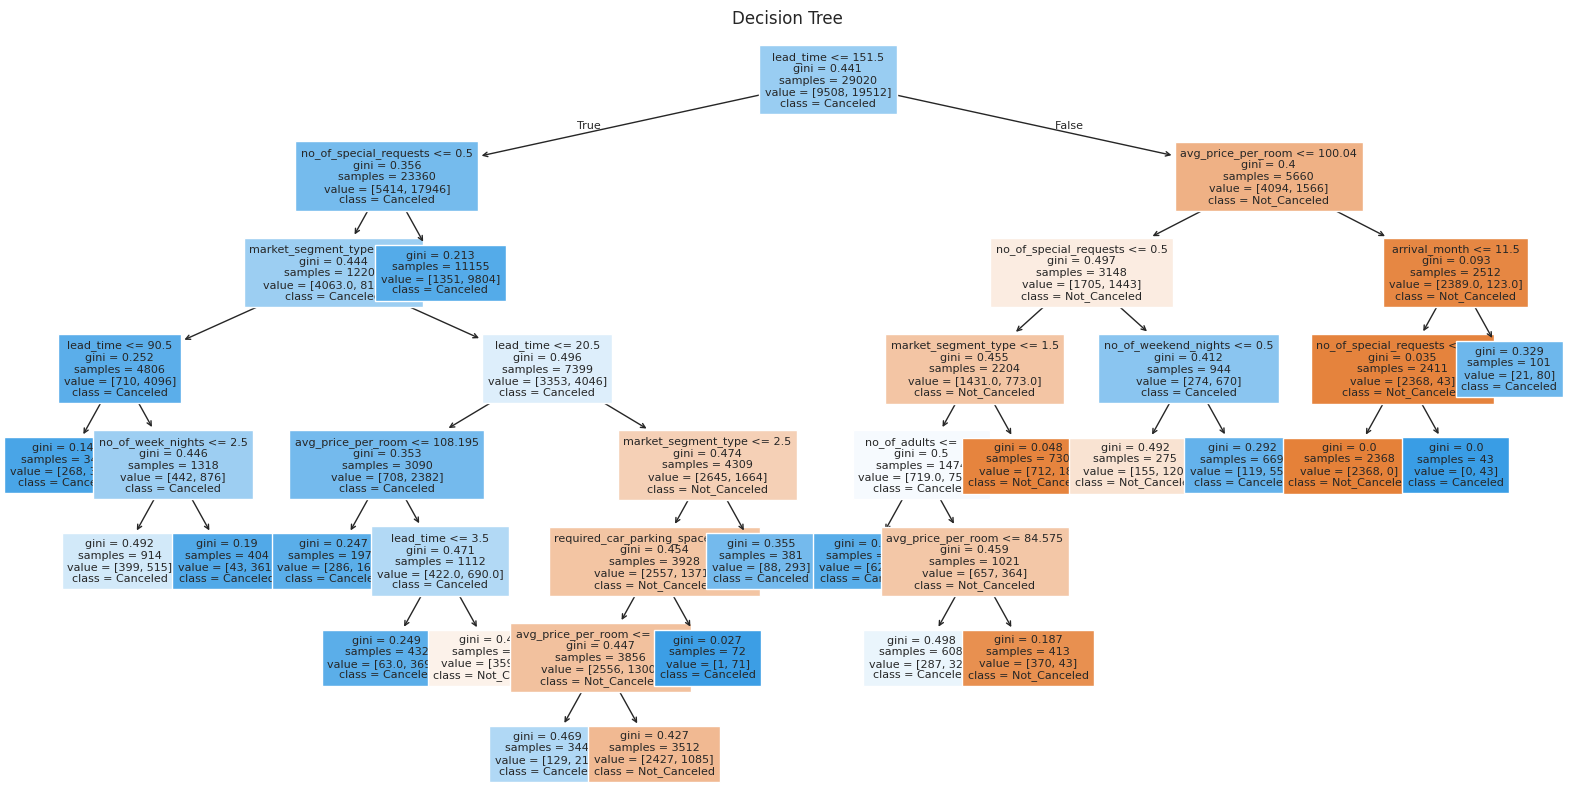

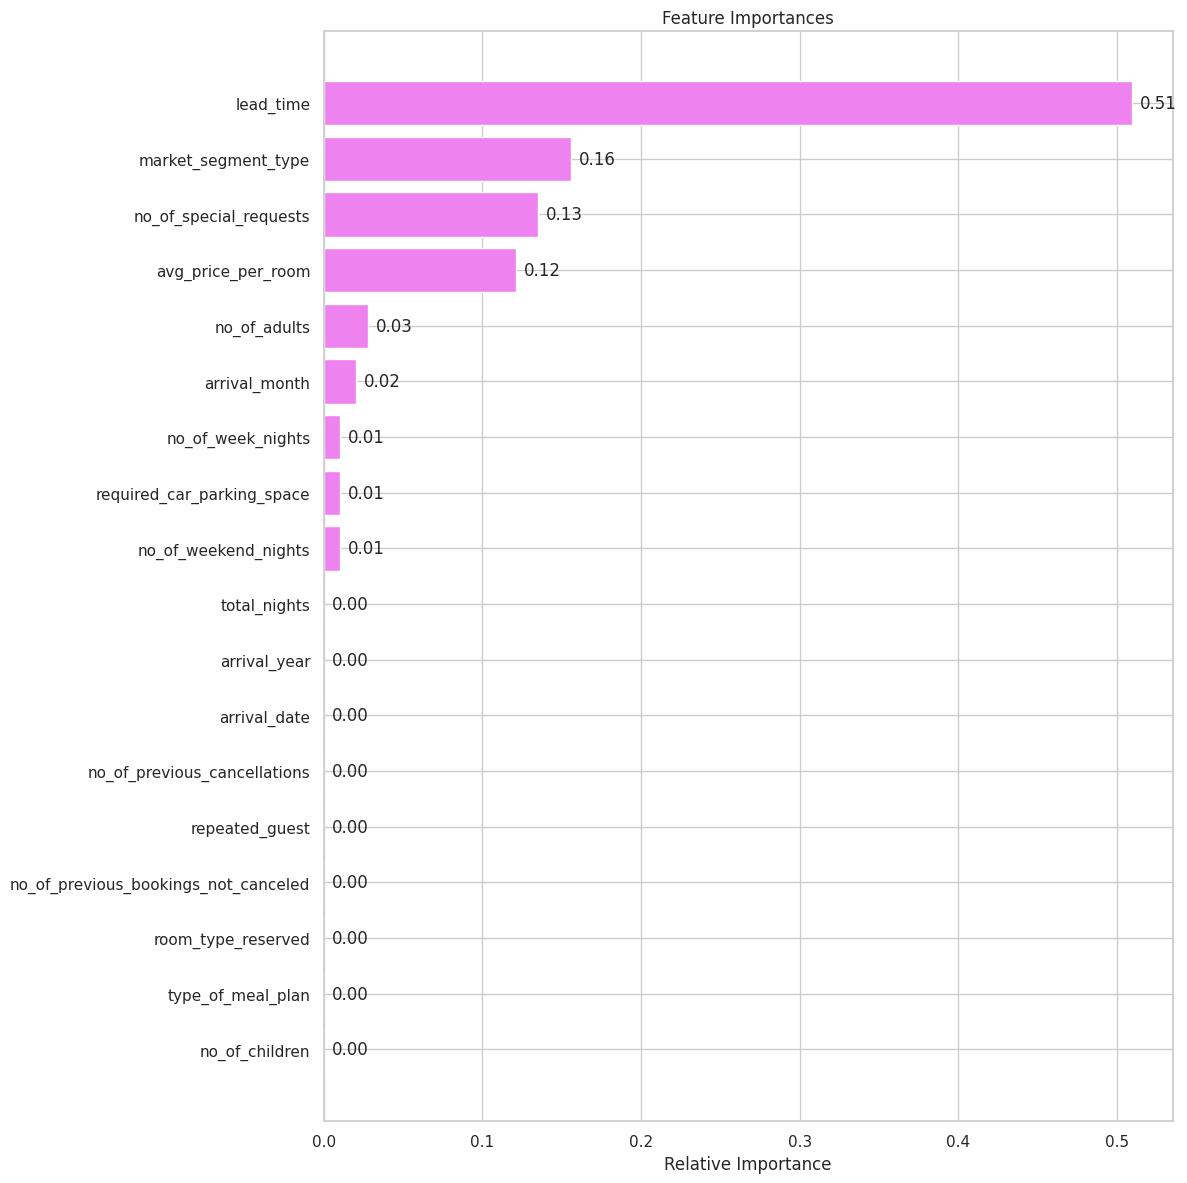

In [22]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth':              [3, 5, 10],
              'min_samples_leaf':       [2, 4, 10],
              'min_samples_split':      [2, 5, 10],
              'max_leaf_nodes':         [10, 15, 20],
              'min_impurity_decrease':  [0.001, 0.01, 1],
              'criterion':              ['gini', 'entropy']
             }

# Type of scoring used to compare parameter combinations
# F1 score is important for a balanced view which is needed here
acc_scorer = make_scorer(f1_score, average='binary', pos_label=1)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_dt, y_train_dt)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train_dt, y_train_dt)

# Evaluate the model
y_test_pred_2 = estimator.predict(X_test_dt)
y_train_pred_2 = estimator.predict(X_train_dt)
evaluate_model_performance(y_train_dt, y_train_pred_2, y_test_dt, y_test_pred_2)
make_confusion_matrix(y_test_pred_2,y_test_dt)

# Visualize the tree
show_decision_tree(estimator, X_train_dt)

# Visualize feature importance
feature_visualization(estimator, X_dt)

This model performs consisently well across the metrics between the training and test set, and has addressed our issues with both overfitting and tree complexity.  This is a winner!

### Cost Complexity Pruning

This prunes (cuts back) a decision tree after fully growing it.

It removes branches that have very little contribution to reducing impurity (i.e., that don’t really help make better predictions).

It tries to balance:

Model complexity (tree size) ❌

Training error (fit to training data) ✅

✅ Goal = Simpler tree + better generalization.

In [23]:
def plot_alphas(x_axis, y_axis, x_label, y_label, title, y_2=None):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(x_axis, y_axis, marker='o', drawstyle="steps-post")
    if y_2:
      ax.plot(x_axis, y_2, marker='o', drawstyle="steps-post")
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    plt.show()


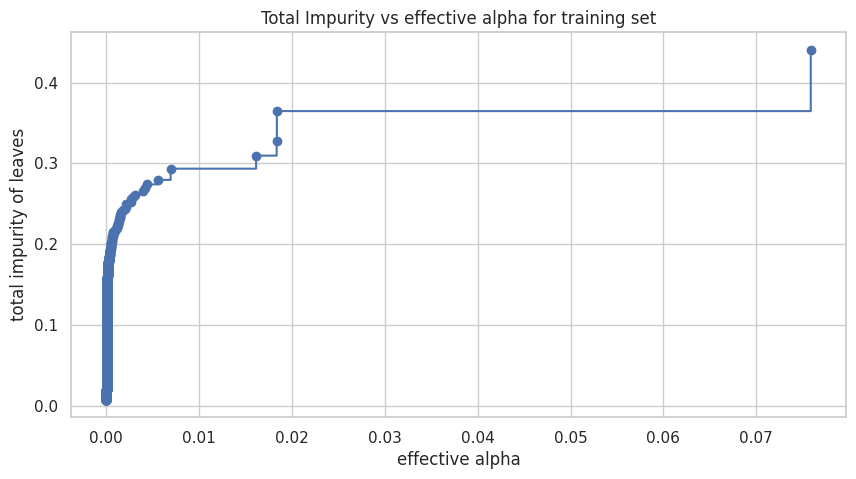

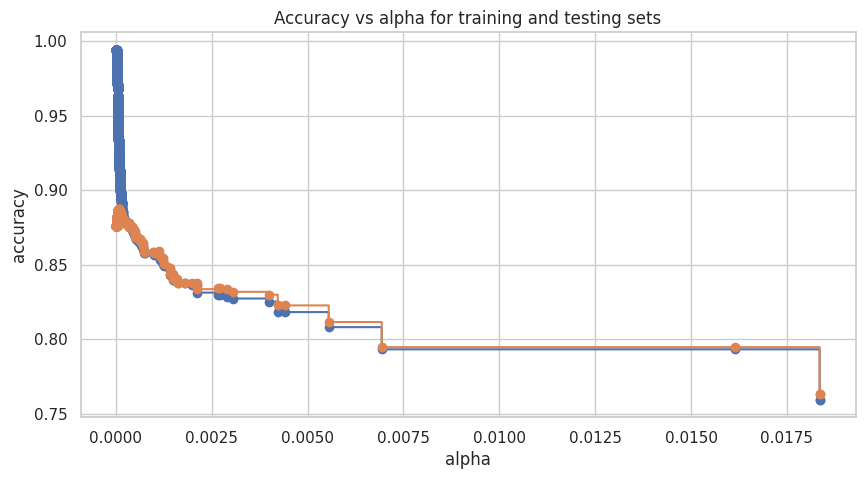


📊 Model Performance Summary:


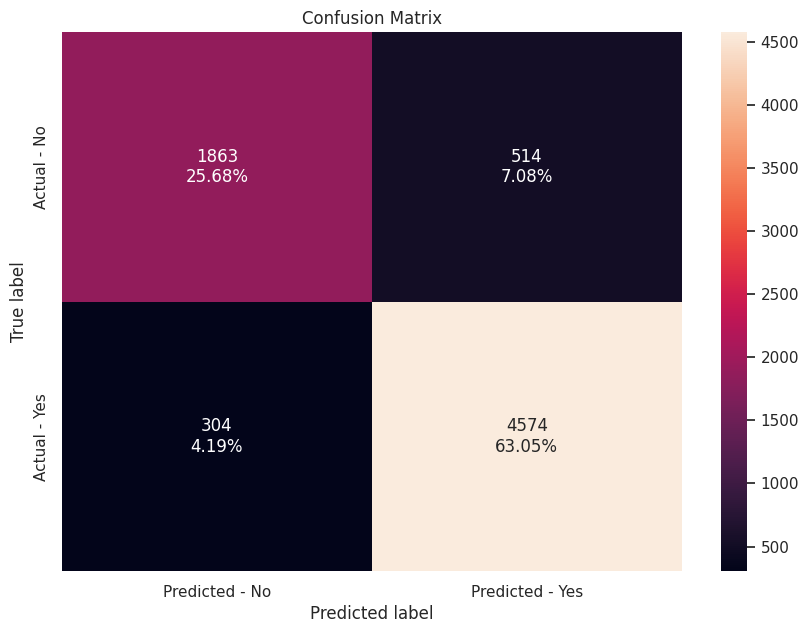

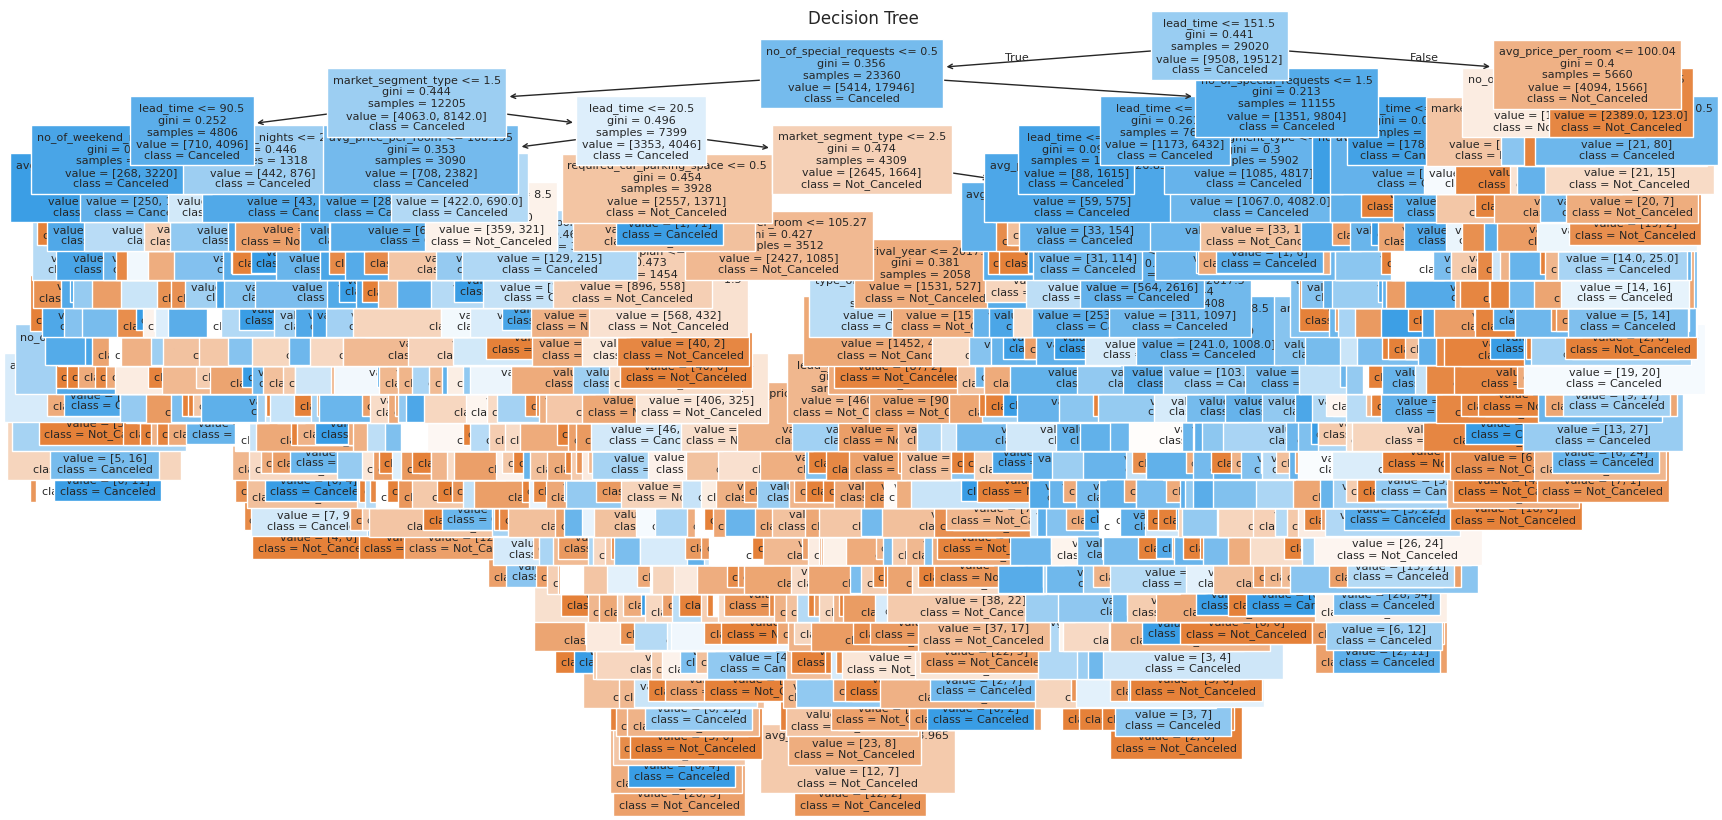

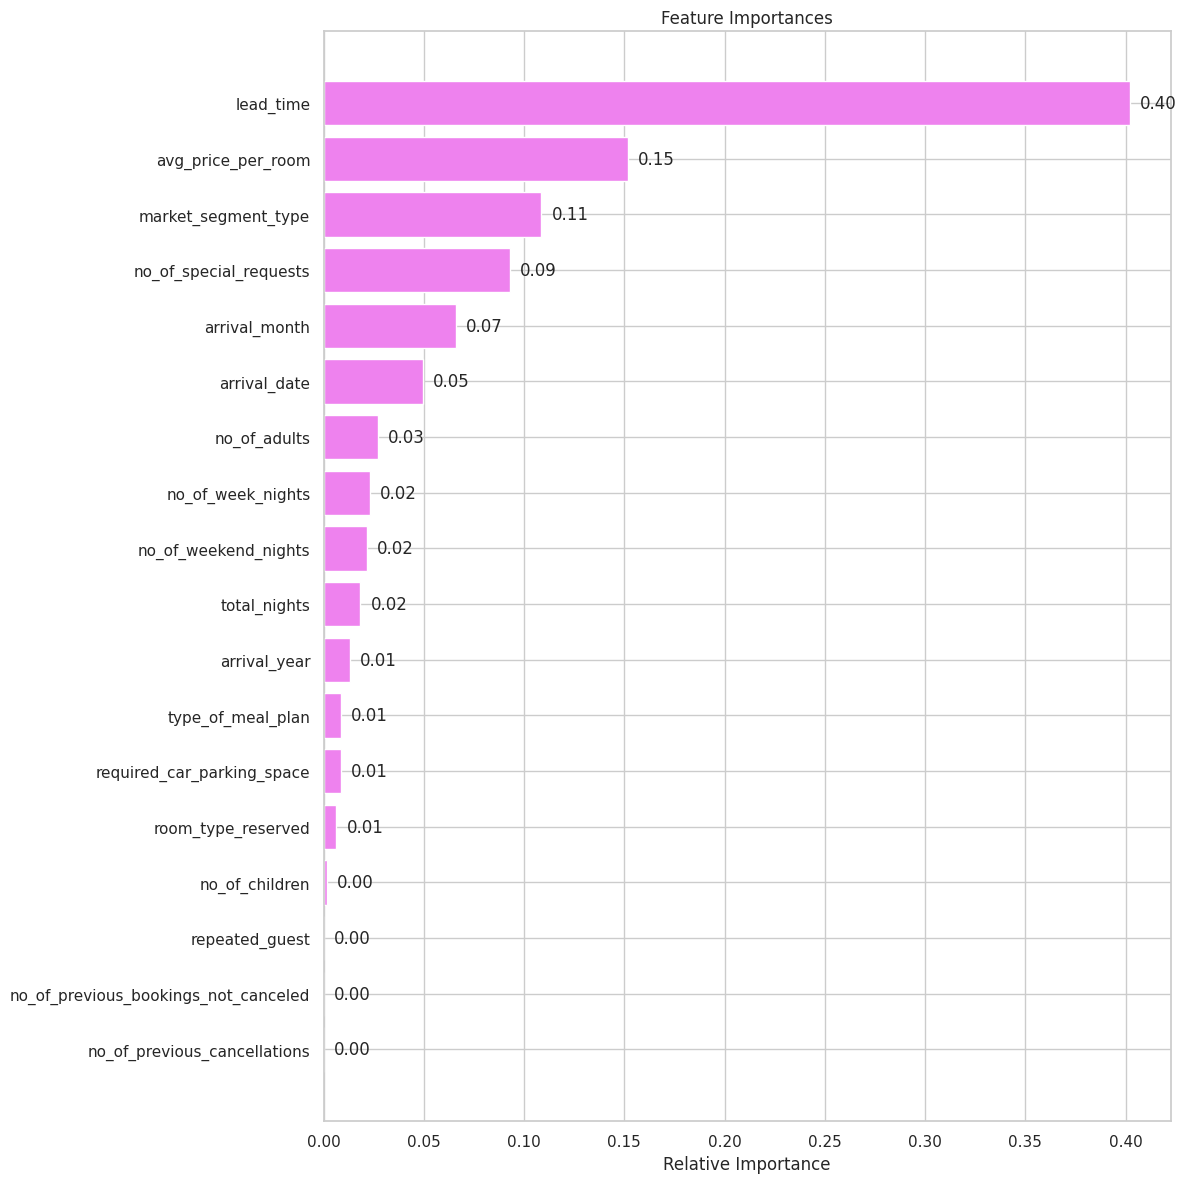

In [24]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train_dt, y_train_dt)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

plot_alphas(ccp_alphas, impurities, "effective alpha", "total impurity of leaves",
            "Total Impurity vs effective alpha for training set")

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train_dt, y_train_dt)
    clfs.append(clf)

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

train_scores = [clf.score(X_train_dt, y_train_dt) for clf in clfs]
test_scores = [clf.score(X_test_dt, y_test_dt) for clf in clfs]

plot_alphas(ccp_alphas, train_scores, "alpha", "accuracy",
            "Accuracy vs alpha for training and testing sets", test_scores)

index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]

# Evaluate the model
y_test_pred_3 = best_model.predict(X_test_dt)
y_train_pred_3 = best_model.predict(X_train_dt)
evaluate_model_performance(y_train_dt, y_train_pred_3, y_test_dt, y_test_pred_3)
make_confusion_matrix(y_test_pred_3, y_test_dt)

# Visualize the tree
show_decision_tree(best_model, X_train_dt)

# Visualize feature importance
feature_visualization(best_model, X_dt)

While using Cost Complexity Pruning resulted in the best F1 score on our test data, the resulting tree was ridiculously complex and difficult to read.

## Model Performance Comparison and Conclusions

In [25]:
def evaluate_multiple_models(train_test_pairs):
    """
    Calculates and displays Precision, Accuracy, Recall, and F1 Score
    for multiple models, showing both Train and Test scores side-by-side.

    Parameters:
    - train_test_pairs: List of tuples
      Each tuple is (y_train, y_pred_train, y_test, y_pred_test)

    Assumes order of models: ["LR", "DT", "DT PP", "DT GSCV", "DT CCP"]
    """

    models = ["LR", "DT", "DT PP", "DT GSCV", "DT CCP"]

    rows = ['Precision', 'Accuracy', 'Recall', 'F1 Score']
    columns = pd.MultiIndex.from_product([models, ['Train', 'Test']], names=["Model", "Set"])

    # Empty DataFrame to populate
    results_df = pd.DataFrame(index=rows, columns=columns)

    for idx, (y_train, y_pred_train, y_test, y_pred_test) in enumerate(train_test_pairs):
        model = models[idx]

        # Train scores
        results_df[(model, 'Train')] = [
            precision_score(y_train, y_pred_train, average='binary'),
            accuracy_score(y_train, y_pred_train),
            recall_score(y_train, y_pred_train, average='binary'),
            f1_score(y_train, y_pred_train, average='binary')
        ]

        # Test scores
        results_df[(model, 'Test')] = [
            precision_score(y_test, y_pred_test, average='binary'),
            accuracy_score(y_test, y_pred_test),
            recall_score(y_test, y_pred_test, average='binary'),
            f1_score(y_test, y_pred_test, average='binary')
        ]

    print("\n📊 Model Comparison Table (Train & Test Scores):")
    display(results_df.style.format("{:.4f}"))


evaluate_multiple_models([
    (y_train_lr_2, y_pred_train_3, y_test_lr_2, y_pred_test_3),
    (y_train_dt, y_train_pred, y_test_dt, y_test_pred),
    (y_train_dt, y_train_pred_1, y_test_dt, y_test_pred_1),
    (y_train_dt, y_train_pred_2, y_test_dt, y_test_pred_2),
    (y_train_dt, y_train_pred_3, y_test_dt, y_test_pred_3),
])


📊 Model Comparison Table (Train & Test Scores):


1. **Logistic Regression** (LR) is stable but has lower ceiling performance
* Train vs. Test scores are very close → no overfitting.

* Precision and recall are both decent (~83% precision, ~89% recall).

* F1 Score (~86%) is balanced but lower compared to tree models.

* ✅ Generalizes well, ❌ less powerful at capturing complex patterns.

* Conclusion: Logistic Regression is a very safe, generalizable model, but it's slightly weaker in predictive power for this task.

2. **Unpruned Decision Tree** (DT) massively overfits
* Train scores are near perfect (99%), test scores drop sharply.

* Huge gap: 99% training vs. 87.5% test accuracy.

* F1 drops from 0.9957 (train) to 0.9070 (test).

* ❌ Classic overfitting — the tree memorizes training data patterns too tightly.

* Conclusion: Pure decision trees without pruning are overfit and unreliable for real-world hotel cancellation prediction.

3. **Pre-Pruning** (DT PP) solves overfitting somewhat, but recall becomes dominant
* Very high recall (test recall = 95.7%) — catches almost all cancellations.

* Precision drops to 77.3% — lots of false positives.

* Accuracy and F1 Score lower than LR and GSCV models.

* ❗ Model tends to overpredict cancellations.

* Conclusion: Pre-pruning leads to high recall (good for catching cancellations) but sacrifices precision and overall balance.

4. **Grid Search CV** (DT GSCV) improves balance
* Precision (85%), Recall (91%), F1 Score (~88%).

* No major overfitting (train/test results very close).

* Stronger overall performance than basic LR or DT PP.

* ✅ Adequately simple and readable Decision Tree with balanced metrics.

* Conclusion: GridSearchCV tuning successfully balances the decision tree, leading to a solid, balanced model for cancellation prediction.

5. **Cost-Complexity Pruning** (DT CCP) gives the best generalization
* Very high precision (89.9%), recall (93.8%), and F1 Score (91.8%).

* Highest test accuracy (88.7%) among all models.

* Very small train/test gap → great generalization.

* Best balance across all metrics, but grossly unreadable tree.  A poor choice for presenting results to executives.

* Conclusion: Cost Complexity Pruning produces the most balanced metrics and the highest F1 score, but the complexity of the decision tree makes it unusable for presentations.  We would only select this if no presentation was needed.

🏆 Final Recommendation:

* **Decision Tree + GridSearchCV** (DT GSCV) is the best model in general.  It has a readable tree while still producing well-balanced results.
* Backup choice if more simplicity is needed → **Logistic Regression**.
* Backup choice if no presentation is needed → **Decision Tree + Cost Complexity Pruning**.

📋 Quick Takeaways:

| Model         | Good For                         |
|---------------|-----------------------------------|
| LR            | Simplicity, stability, fast inference |
| DT (no pruning) | ❌ Overfits badly                |
| DT PP         | High recall, but low precision     |
| DT GSCV       | Good balance with readable tree        |
| DT CCP        | Best overall generalization, but unreadable tree        |

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

---

## 1. Guest Behavior Insights

- From EDA, October, September, and August are the busiest months.
- The Online segment is the dominant source of guests.
- Repeating guests cancel at a very low rate (only 1.72%).
- Guests making special requests cancel significantly less frequently.

**Recommendations:**
- Increase room rates and staffing during October, September, and August.
- Focus marketing campaigns and budget primarily on Online channels.
- Expand loyalty programs to encourage repeat guests and offer softer policies for them.
- Encourage special requests during the booking process to lower cancellation rates.
- Consider finding a way to "lock in" low-risk bookings in the system to ensure they don't get overbooked.

---

## 2. Market Segment and Pricing Insights

- Online guests pay the highest room rates on average (~€112).
- Aviation and Offline segments pay moderately high rates.
- Complementary guests pay almost nothing (~€3).
- Offline and Complementary bookings have higher cancellation rates.

**Recommendations:**
- Upsell premium rooms and packages to Online and Corporate guests.
- Restrict or monitor complimentary bookings unless tied to loyalty or marketing initiatives.
- Require advance payment or deposits for Offline bookings to protect revenue.

---

## 3. Cancellation Behavior Insights

- Around 32.76% of all bookings are canceled.
- Bookings with no special requests have the highest cancellation rates (~43%).

**Recommendations:**
- Implement tiered cancellation policies:
  - Non-refundable option: offer a 5–10% discount.
  - Full refund policy only if canceled more than 7 days in advance.
- Encourage guests to submit special requests during the booking flow.
- Charge cancellation fees (e.g., one night's stay) for last-minute cancellations (within 3 days of arrival).
- Determine the average rate of cancellation for any given date and consider allowing overbooking of rooms by that amount, so that all rooms can be filled.

---

## 4. Profitable Policies for Cancellations and Refunds

- Offer non-refundable booking options with small discounts.
- Apply stricter refund rules during peak months (October, September, August).
- Require partial prepayment for high-risk segments (Offline).
- Allow flexible cancellation only for loyalty members (3+ stays).
- Offer early bird promotions for early commitment bookings, as bookings made 91+ days in advance are far less likely to cancel.

---

## 5. Additional Recommendations

- Implement dynamic pricing based on demand, occupancy, and competitor analysis.
- Launch targeted email marketing campaigns based on booking behavior (early bookers, repeat guests, corporate clients).
- Build partnerships with Online Travel Agencies (OTAs) to enhance visibility.
- Track special requests trends and refine service based on guest preferences.
- Gather post-booking engagement to strengthen guest commitment (e.g., "Would you like a quiet room or a view room?").

---
